First we are going to import all the libraries and modules that we need to start our analysis

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
import html
import string
import warnings
import ast
import copy
from bs4 import BeautifulSoup
import re
import scipy.cluster.hierarchy as shc
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
warnings.filterwarnings("ignore")

For this project, by web scraping we were able to obtain roughly 3000 job postings in the field of data science and analytics from glassdoor website. In the last part of this project, we evaluated the skills required to redesign curriculum for MIE 1624 from salary perspective by analyzing Kaggle's surveys from 2018 and 2019. In this section, we would like to evaluate skills from the perspective of job opportunities. After this course, students should be able to at least apply for internship positions in data science field. Thus, these postings would explain to use what are the main skill that firms are looking for from their applicants.

In [2]:
# Import job postings that are cleaned csv file
job = pd.read_csv(r'C:\Users\Mostafa Kouchakzadeh\Desktop\MIE\New folder\new1.csv')
# Import job postings that are not cleaned  csv file
jobs = pd.read_csv(r'C:\Users\Mostafa Kouchakzadeh\Desktop\MIE\job_cleaned.csv')

In [3]:
jobs.head()

Unnamed: 0                     company  \
0         270                    SGA Inc.   
1         270                        IPSY   
2         270                   Discovery   
3         627  APN Software Services Inc.   
4         271           Moody's Analytics   

                                  job_title  \
0                           HR Data Analyst   
1                       Senior Data Analyst   
2                           Sr Data Analyst   
3      Pharmaceutical Customer Data Analyst   
4  Finacial Data Analyst - Spanish Required   

                                                link              location  \
0  https://www.glassdoor.ca/partner/jobListing.ht...             Plano, TX   
1  https://www.glassdoor.ca/partner/jobListing.ht...         San Mateo, CA   
2  https://www.glassdoor.ca/partner/jobListing.ht...          New York, NY   
3  https://www.glassdoor.ca/partner/jobListing.ht...  Plymouth Meeting, PA   
4  https://www.glassdoor.ca/partner/jobListing.ht...          New York, NY   

                                     job_description  
0  excel tableau tableau excel excel data models ...  
1  sql tableau tableau data warehouse engineering...  
2  python r java machine learning big data sql ta...  
3  excel sql excel relational databases excel bac...  
4  excel excel excel communication finance economics

In [4]:
job.head()

Unnamed: 0                     company  \
0         0.0                    SGA Inc.   
1         1.0                        IPSY   
2         2.0                   Discovery   
3         3.0  APN Software Services Inc.   
4         4.0           Moody's Analytics   

                                  job_title              location  adobe  \
0                           HR Data Analyst             Plano, TX      0   
1                       Senior Data Analyst         San Mateo, CA      0   
2                           Sr Data Analyst          New York, NY      0   
3      Pharmaceutical Customer Data Analyst  Plymouth Meeting, PA      0   
4  Finacial Data Analyst - Spanish Required          New York, NY      0   

   artificial intelligence  airflow  API  autosys  aws   ...     spss  sql  \
0                        0        0    0        0    0   ...        0    0   
1                        0        0    0        0    0   ...        0    1   
2                        0        1    0        0    1   ...        0    1   
3                        0        0    0        0    0   ...        0    1   
4                        0        0    0        0    0   ...        0    0   

   ssrs  statistics  stem  stewardship  structure  tableau  warehouse  writing  
0     0           0     0            0          0        1          0        0  
1     0           1     0            0          0        1          1        0  
2     0           1     1            0          0        1          0        0  
3     0           0     0            0          0        0          0        0  
4     0           0     0            0          0        0          0        0  

[5 rows x 75 columns]

As we can see from a sample of rows in the data frame, Columns are related to company's name, job title, location and the skills required for each specific job posting. Data is precleared and based on the skills required we have binary variables. To begin redesigning the course curriculum, we need to have a programming language. Data science is a field that knowing at least one programming language is quite necessary since most of the works are done via coding. Thus, this will encourage us to first begin with finding the most important programming languages. As we look through data from Kaggle surveys from 2018 and 2019, we realized that most important programming languages are R, Python and SQL in the field of data science. Now, we want to look deeper in the job postings from galssdoor to better understand about importance of each programming language in case of job availability. Programming languages that we want to explore are: R, Python, C, Java, Javascript, SQL, MATLAB, and PHP

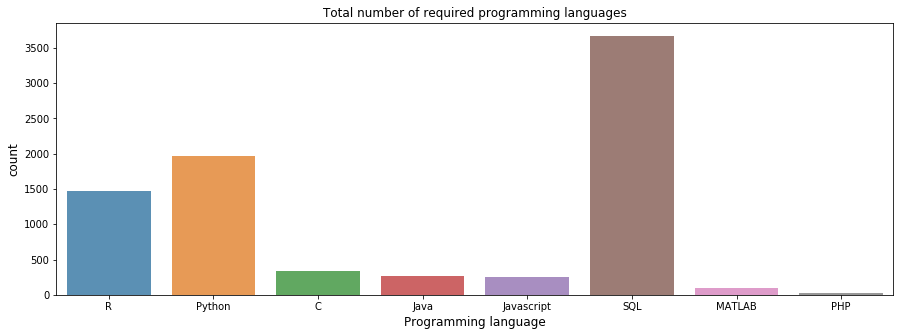

In [5]:

plt.figure(figsize=(15,5))
sns.barplot(['R', 'Python', 'C','Java','Javascript','SQL','MATLAB','PHP'\
            ], [sum(job.r),sum(job.python),sum(job.c),sum(job.java),sum(job.javascript),sum(job.sql),sum(job.matlab),sum(job.php)], alpha=0.8)
plt.title('Total number of required programming languages')
plt.ylabel('count', fontsize=12)
plt.xlabel('Programming language', fontsize=12)
plt.show()

As we can, similar to what we had in case of Kaggle's surveys most of the job postings required SQL as the programming language, in the second position we have about 1000 job postings that require Python, and at the third place we have about 750 job postings published R as their required programming language. However, many of these postings state multiple programming languages. In case of MIE 1624, since the course name is stated as introduction to data science and analytics, it is better to use Python as primary programming language, similar to the current case. Due to the fact that many of the students are more familiar with this programming language because it is one of the most user-friendly environment for coding. However, we suggest that as an extra work, class would have several tutorials about SQL and an assignment that need to be done with SQL as the programming language. This would engage and familiarize students with the programming language that seems to have a high demand in the field of data science and analytics. In the following part, let us look on word cloud that represent the most required skills for further analysis.

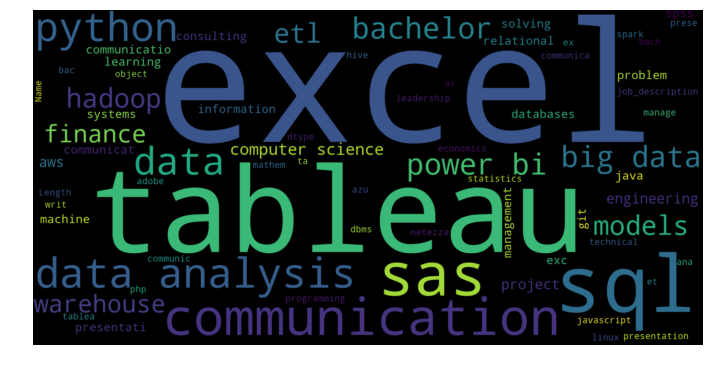

In [6]:
from wordcloud import WordCloud
# Create the wordcloud object
text = str(jobs['job_description'])
wordcloud = WordCloud(width = 1600,height = 800, max_font_size  = 400).generate(text)
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Form the result shown above, as we can see tableau which is one of the most popular Data Visualization tools used by Data Science and Business Intelligence professionals today. It enables a data scientist to create insightful and impactful visualizations in an interactive and colorful way. So, it is better to have it in mind when we are trying to restructure the course. Excel which is the basic tool for whoever works with data is another important skill for most of the job postings. Since it is quite basic, we do not need to focus on this tool since it is assumed that students are familiar with the software. Python and SQl are among the most important skill as we discussed before. SAS which is is web-based environment that supports several applications. It allows a data analytic or a data scientist to create beautiful, interactive dashboards or reports that are immediately available on the web or a mobile device. communication is another important factor that is quite important in job postings and seems to be mentioned in many postings.

In the next part, we are going to define a dictionary to find words that are related to a specific skill. After finding these words, we are going to define a function to clean our job posting description to help us identify skills that are the most important in the field of data science and analytics.

In [7]:
# Creating the skill and sub-skills dictionary
# Keys represen the skills
# Values are the sub-skills
# The skills include hard skills and soft skills
skills_keywords_dict_web_scraping = {
                            'Excel': ['exce'],
                            'Python': ['python'],
                            'R': [' r '], # 'R' surrounded by spaces and signs
                            'Ruby': ['ruby'],
                            'Java/Scala': ['java','scala', 'javascript'],
                            'C/C++': ['c/c++', 'c++', ' c '],   # 'C' surrounded by spaces and signs
                            'MATLAB': ['matlab'],
                            'SAS': ['sas'],
                            'Databases': ['sql', 'databases','mysql','kdd','stewardship'],
                            'SQL':['sql','ssrs'],
                            'etl':['etl'],
                            'Business Intelligence':['business','bi','intelligence','business intelligence','power','powerbi'],
                            'Data Management':['data magement','management','airflow'],
                            'SPSS': ['spss'],
                            'Machine Learning': ['machine learning', 'ml','machine','learning'],
                            'Data Mining/Analytics': ['data mining', 'analytics', 'data analytics','data'],
                            'Artificial Intelligence':['ai','intelligence'],
                            'spark' : ['spark'],
                            'AWS':['aws'],
                            'Azure':['azure'],
                            'Agile':['agile'],
    'Autosys':['autosys'],
    
    'Simulation':['Simulation'],
    'Operation Research':['Operation Research'],
                            'Visualisation': ['Visualisation', 'Visualization','Power Point', 'tableau'],
                            'Tableau':['tableau'],
                            'Software':['software development','computer','computer programming'],
                            'Big Data': ['Big Data', 'Spark', 'kafka', 'Hive','data', 
                                         'beam', 'hadoop', 'mapReduce', 'hbase','mangoDB','Cassandra','Neo4','HDFS',
                                        'Google Cloud Dataproc',
                                        'Google Cloud Dataflow',
                                        'Google Cloud Dataprep',
                                        'AWS Kinesis',
                                        'Google Cloud Pub/Sub',
                                        'AWS Athena',
                                        'AWS Redshift',
                                        'Google BigQuery',
                                        'Teradata',
                                        'Microsoft Analysis Services',
                                        'Oracle Exadata',
                                        'Oracle Warehouse Builder',
                                        'SAP IQ',
                                        'Snowflake',
                                        'Databricks',
                                        'Azure SQL Data Warehouse',
                                        'Azure HDInsight',
                                        'Azure Stream Analytics',
                                        'IBM InfoSphere DataStorage',
                                        'IBM Cloud Analytics Engine',
                                        'IBM Cloud Streaming Analytics','cognos'
                                        ],
    
                            'Cloud': ['Cloud', 'AWS','EC2', 'GCP', 'Azure ', 'Google Cloud'
                                                        'Amazon Web Services',
                                                        'Microsoft Azure',
                                                        'IBM Cloud',
                                                        'Alibaba Cloud',
                                                        'api','google',
                                                        'Google Compute Engine',
                                                        'AWS Elastic Beanstalk',
                                                        'Google App Engine',
                                                        'Kubernete',
                                                        'Lambda',
                                                        'Google Cloud Functions',
                                                        'AWS Batch',
                                                        'Azure Virtual Machines',
                                                        'Azure Container Service',
                                                        'Azure Functions',
                                                        'Azure Event Grid',
                                                        'Azure Batch',
                                                        'Azure Kubernetes Service',
                                                        'IBM Cloud Virtual Servers',
                                                        'IBM Cloud Container Registry',
                                                        'IBM Cloud Kubernetes Service',
                                                        'IBM Cloud Foundry'
                                                        ],
                            'Math': ['Algebra', 'Statistics', 'Operations research','Calculus' ],
                        
                            # soft skills
    
                            'communication skills':['communication','ability to explain','explaination','negotiation','speaking','listening','relationship','open to feedback','receptiveness to feedback','body language','presentation'],
                            'organizational and management skills':['management','organizational skills', 'project management', 'management skills','self management','keeping deadline','delegation','time management','conflict management','decision making','leadership','coaching','mentoring'],
                            'professional skills':['proble','problem solving','solving','professional','professional skills','consult','consulting','consultation','documenting','storytelling','reporting','visualization','manipulating','experimentation','professionalism'],
                            'interpersonal skills':['interpersonal skills','self confidence','confidence','respectfulness','dependability','gesture','appreciation','showing positivity','creativity','commitment','accountability','change ready','innovation','innovative thinking','friendliness','adaptability','courtesy','flexibility','integrity','adaptable','creative','Creativity'],
                            'work place skills':['teamwork','team working','team work','ethic','collaboration','managing stakeholder expectations','problem solving','independently','multitasking','multitask','ad-hoc analysis','fast delivery','workplace etiquette']
                        }


Now, we are going to define functions to analyze whether skills mentioned in the job postings are related to any of the categories that we had in case of the defined dictionary. In the following parts we are going to perform hierachal clustering for further analysis.

In [8]:
import scipy.cluster.hierarchy as shc
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

In [9]:
def skill_count(dfSkill,skills_keywords_dict_web_scraping):
    df = pd.DataFrame()
    df['job_description']=dfSkill['job_description']
    for item in skills_keywords_dict_web_scraping:
        df[item]=0
        
    for i in range(0,len(df)):
        for j in range(1,len(df.columns)):
            values = skills_keywords_dict_web_scraping[df.columns[j]]
            for value in values:
                if (value.lower() in df.iloc[i,0]):
                    df.iloc[i,j] = 1
                    
    return df

In [10]:
DS_skill_count_df= skill_count(jobs,skills_keywords_dict_web_scraping)
DS_skill_count_df.head()     

job_description  Excel  Python  R  Ruby  \
0  excel tableau tableau excel excel data models ...      1       0  0     0   
1  sql tableau tableau data warehouse engineering...      0       0  0     0   
2  python r java machine learning big data sql ta...      0       1  1     0   
3  excel sql excel relational databases excel bac...      1       0  0     0   
4  excel excel excel communication finance economics      1       0  0     0   

   Java/Scala  C/C++  MATLAB  SAS  Databases        ...          Tableau  \
0           0      0       0    0          0        ...                1   
1           0      0       0    0          1        ...                1   
2           1      0       0    0          1        ...                1   
3           0      0       0    0          1        ...                0   
4           0      0       0    0          0        ...                0   

   Software  Big Data  Cloud  Math  communication skills  \
0         0         1      0     0                     1   
1         0         1      0     1                     0   
2         1         1      1     1                     0   
3         0         1      0     0                     0   
4         0         0      0     0                     1   

   organizational and management skills  professional skills  \
0                                     0                    1   
1                                     0                    0   
2                                     0                    0   
3                                     0                    0   
4                                     0                    0   

   interpersonal skills  work place skills  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0  

[5 rows x 36 columns]

Hierachal clustering is one of the most popular unsupervised machine learning algorithm. Clustering is basically a technique that groups similar data points such that the points in the same group are more similar to each other than the points in the other groups. The group of similar data points is called a Cluster (https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec). The technique that we used in this project is called similarity cosine clustering. This approach analyzes how similar documents are regardless of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. In this context, the two vectors I am talking about are arrays containing the word counts of two documents (https://www.machinelearningplus.com/nlp/cosine-similarity/)

In [11]:
# Defining a function to cluster the skills (Hierarchical clustering)
def Hierarchical_clustering(df,skills_keywords_dict_web_scraping,DS):
    # Stroing the keys of the dictionary as list
    skillsList = list(skills_keywords_dict_web_scraping.keys())
    # Storing the lenght of the dataframe
    n_data = len(df)

    # distance_matrix = np.zeros(shape = (n_data, len(skillsList)))
    distance_matrix = np.zeros(shape = (len(skillsList),n_data))

    # calculating the distance matrix
    for i in range(0, n_data):
        for j in range(0,len(skillsList)):
            distance_matrix[j][i] = df[skillsList[j]][i]

    dist = 1 - cosine_similarity(distance_matrix)


    linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

    # Plotting the outcome
    fig, ax = plt.subplots(figsize=(15, 20)) # set size
    ax = dendrogram(linkage_matrix, orientation="right", labels=skillsList,p=40,truncate_mode='level');

    plt.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    # Customizing the tickmarks on the y label
    plt.yticks(fontsize=14)
    plt.tight_layout() #show plot with tight layout

    # uncomment below to save the figure
    if DS:
        plt.savefig('ward_clusters_JS_DS.PNG', dpi=480)
        
    else:
        plt.savefig('ward_clusters_JS_BDS.PNG', dpi=480)

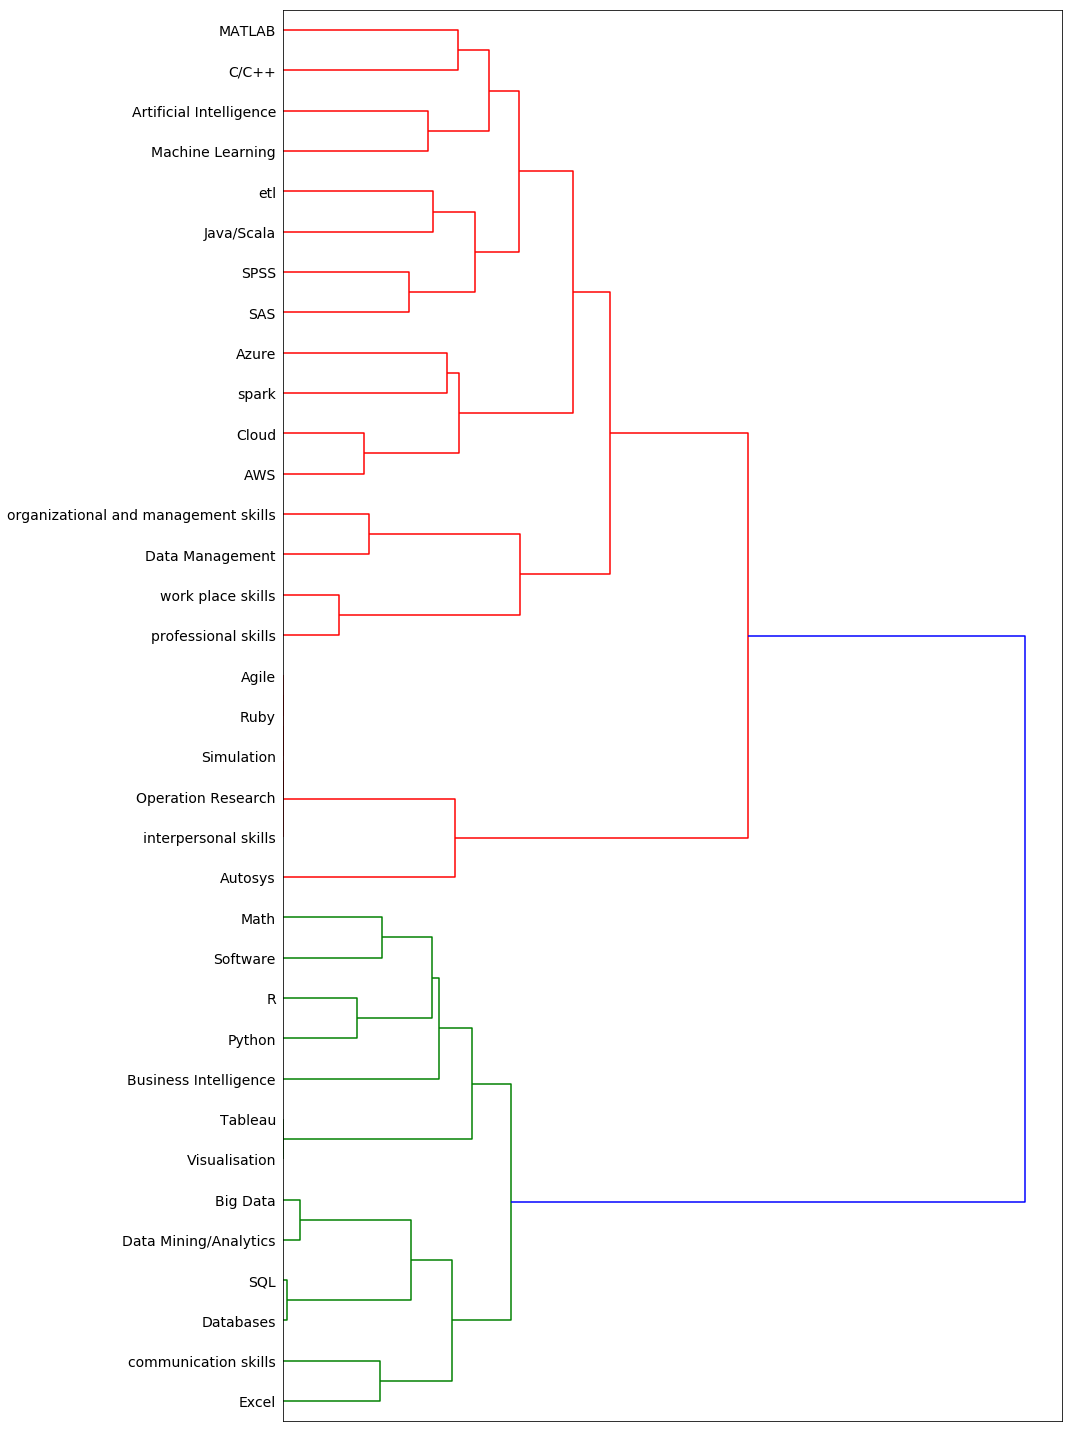

In [12]:
Hierarchical_clustering(DS_skill_count_df,skills_keywords_dict_web_scraping,True)

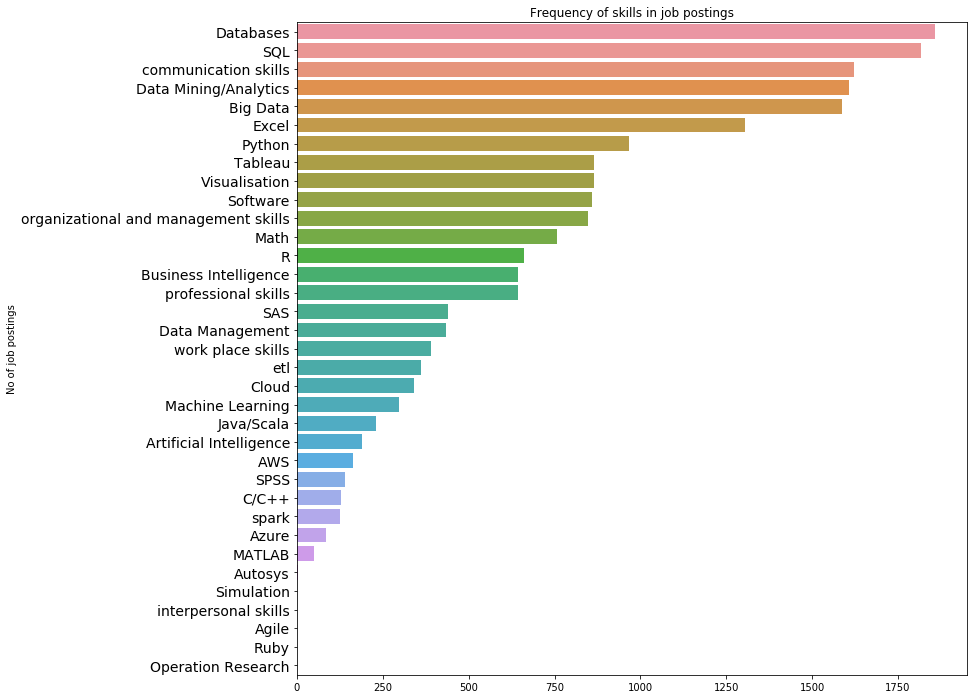

In [13]:
# Plotting the frequency of skills in job postings
plt.figure(figsize=(12,12))
sums_of_skills = DS_skill_count_df.iloc[:, 1:].sum().sort_values(ascending=False)
sns.barplot(y=sums_of_skills.index, x=sums_of_skills,orient ='h')
# Custoizing the tickmarks on y axis
plt.yticks(fontsize=14)
# Setting the plot y label
plt.ylabel("No of job postings")
# Setting the plot title
plt.title("Frequency of skills in job postings")
# Displaying the plot
plt.show()

AS we discussed before, considering programming languages, Python and SQL are the most important ones that the focus of this course should be on that. In addition, from the graph we can interpret, that database is one of the most popular skills that job postings are seeking for. However, in MIE 1624, introduction to data science and analytics, we have not focused on this skill. Thus, from the analysis, we are intrigued to add concept of database in this course. Communication skill is a critical skill that a data scientist should have to be able to progress in his or her career. Nevertheless, it is not considered a skill that have in mind when designing our course. Data mining seems to be quite important in the field of data science. We are exposed to data analytics in some degree, however we have not work either in big data or data mining. Tableu, which is visualization tool, is a required skill in most of job postings. Cloud and machine learning are among the skills that were asked in more than 250 job postings. 

The result of this analysis gave us some perspective about what needs to be considered during redesigning the course. However, we are going now to use another data set that we were able to find in Kaggle website. It includes more than 10000 job postings including internship, full time, contractor and part time jobs. We are going to focus only on full time jobs. The data frame is not fully cleaned so we need to also clean it in this part. From the results that we had from this data frame and the previous works that were done, we then going to decided how to change the structure of the course.

In [14]:
kaggle = pd.read_csv(r"C:\Users\Mostafa Kouchakzadeh\Desktop\MIE\kaggle_jobpostings.csv")
text = kaggle

Before getting to other parts, let us have a glance to what cloud word for this data frame would indicate.

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
description_example = text.job_description[2].lower()
word_tokens = word_tokenize(description_example)
filtered_description = [w for w in word_tokens if not w in stop_words]
filtered_description = " ".join(filtered_description)

In [16]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import plot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#sorted_req

In [17]:
aggregate_descriptions = " ".join(job_description.lower() 
                      for job_description in text.job_description)
stopwords = set(STOPWORDS)

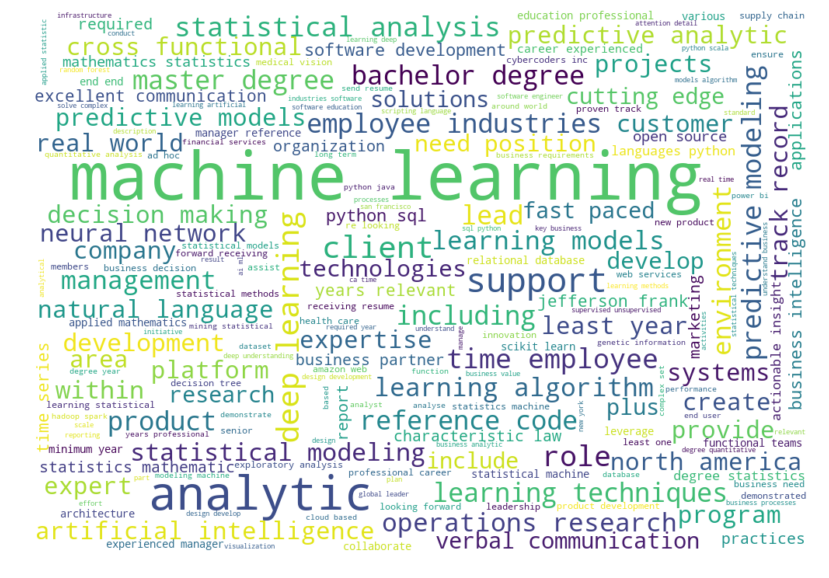

In [18]:
stopwords.update(['experience', 'following', 'candidates', 'big', 'background','developing', 'characteristics', 'data', 'team', 'data', 'scientist', 'strong', 'project', 
                  'solution', 'technology', 'science', 'model', 'knowledge','skill', 'work', 'build', 'will', 'knowledge', 'application','gender', 'identity', 'equal',
                  'opportunity','related','field', 'without', 'regard', 'national', 'origin', 'religion', 'sex', 'race', 'color', 'veteran', 'status','sexual',
                  'orientation','opportunity', 'employer', 'qualified','applicant','skills', 'job', 'summary', 'advanced', 'system', 'applicants', 'receive', 'large', 'best', 'practice', 'problem'
                 , 'processing', 'affirmative', 'action', 'employment', 'consideration', 'receive', 'united', 'state', 'programming', 'computer', 'working', 'saying', 
                  'preferred', 'qualification', 'disability', 'protected', 'structured', 'unstructured', 'problems', 'technical', 'internal', 'external', 'non',
                 'subject', 'matter', 'please', 'apply', 'using', 'dental', 'reasonable', 'accomodation', 'join', 'us', 'tools', 'individuals', 'disabilities'
                 , 'type', 'full', 'wide', 'range', 'duties', 'responsibilities', 'stakeholder', 'oral', 'written', 'ideal', 'candidate', 'ability', 'qualifications', 'well',
                  'must', 'able', 'unit', 'member', 'posted', 'today', 'service', 'clearance', 'days', 'ago', 'high', 'quality', 'level', 'every', 'use', 'case', 'additional'])
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                     width=1000, height=700).generate(aggregate_descriptions)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Machine learning, analytics, statistical analysis, artificial intelligence are the most important features that are represented in most of the job postings.

We need to define function to clean the data from any noise. Moreover, we need to add some skills to our dictionary that fit with the new data. We have decided to define a new dictionary that is slightly different than what we had before.

In [19]:
skills_keywords_dict = {
                            'Excel': ['Excel'],
                            'Python': ['Python'],
                            'R': [' R '], # 'R' surrounded by spaces and signs
                            'Java/Scala': ['Java', 'JVM', 'Scala', 'Javascript'],
                            'C/C++': ['C/C++', 'C++', ' C '],   # 'C' surrounded by spaces and signs
                            'MATLAB': ['MATLAB'],
                            'SAS': ['SAS'],
                            'Databases': ['SQL', 'databases','NOSQL','Oracle'],
                            'SQL':['SQL'],
                            'etl':['etl'],
                            'Business Intelligence':['Business Intelligence'],
                            'Data Management':['Data Management'],
                            'Machine Learning': ['Machine Learning', 'ML'],
                            'Data Mining/Analytics': ['Data Mining', 'Analytics', 'Data Analytics'],
                            'Artificial Intelligence':['artificial intelligence'],
                            'NLP': ['Natural Language Processing', 'NLP'],
                            'spark' : ['spark'],
                            'AWS':['AWS'],
                            'Azure':['Azure'],
                            'Agile':['Agile'],
    'Optimization':['Optimization'],
    
    'Simulation':['Simulation'],
                            'Visualisation': ['Visualisation', 'Visualization','Power Point', 'Tableau'],
                            'Tableau':['Tableau'],
                            'Software':['Software development'],
                            'Big Data': ['Big Data', 'Spark', 'kafka', 'Hive', 
                                         'beam', 'Hadoop', 'MapReduce', 'Hbase','MangoDB','Cassandra','Neo4','HDFS',
                                        'Google Cloud Dataproc',
                                        'Google Cloud Dataflow',
                                        'Google Cloud Dataprep',
                                        'AWS Kinesis',
                                        'Google Cloud Pub/Sub',
                                        'AWS Athena',
                                        'AWS Redshift',
                                        'Google BigQuery',
                                        'Teradata',
                                        'Microsoft Analysis Services',
                                        'Oracle Exadata',
                                        'Oracle Warehouse Builder',
                                        'SAP IQ',
                                        'Snowflake',
                                        'Databricks',
                                        'Azure SQL Data Warehouse',
                                        'Azure HDInsight',
                                        'Azure Stream Analytics',
                                        'IBM InfoSphere DataStorage',
                                        'IBM Cloud Analytics Engine',
                                        'IBM Cloud Streaming Analytics',
                                        ],
    
                            'Cloud': ['Cloud', 'AWS','EC2', 'GCP', 'Azure ', 'Google Cloud'
                                                        'Amazon Web Services',
                                                        'Microsoft Azure',
                                                        'IBM Cloud',
                                                        'Alibaba Cloud',
                                      
                                                        'Google Compute Engine',
                                                        'AWS Elastic Beanstalk',
                                                        'Google App Engine',
                                                        'Kubernete',
                                                        'Lambda',
                                                        'Google Cloud Functions',
                                                        'AWS Batch',
                                                        'Azure Virtual Machines',
                                                        'Azure Container Service',
                                                        'Azure Functions',
                                                        'Azure Event Grid',
                                                        'Azure Batch',
                                                        'Azure Kubernetes Service',
                                                        'IBM Cloud Virtual Servers',
                                                        'IBM Cloud Container Registry',
                                                        'IBM Cloud Kubernetes Service',
                                                        'IBM Cloud Foundry'
                                                        ],
                            'Deep Learning':['Deep learning', 'Tensor Flow','Caffe','Keras','Microsoft Cognitive Toolkit','IBM Watson','DeepLearning4J'],
                            'Tensor Flow':['Tensor Flow','TensorFlow'],
                            'Keras':['Keras'],
    
                            'Math': ['Algebra', 'Statistics', 'Operations research','Calculus' ],
                            'machine learning framework' :['Scikit Learn','Scikit','scikit-learn',
                                        'TensorFlow',
                                        'Keras',
                                        'PyTorch',
                                        'Spark MLlib',
                                        'H20',
                                        'Fastai',
                                        'Mxnet',
                                        'Caret',
                                        'Xgboost',
                                        'mlr',
                                        'Prophet',
                                        'randomForest',
                                        'lightgbm',
                                        'catboost',
                                        'CNTK',
                                        'Caffe'
                                        ],
    
                            'communication skills':['communication','ability to explain','explaination','negotiation','speaking','listening','relationship','open to feedback','receptiveness to feedback','body language','presentation'],
                            'organizational and management skills':['organizational skills', 'project management', 'management skills','self management','keeping deadline','delegation','time management','conflict management','decision making','leadership','coaching','mentoring'],
                            'professional skills':['professional skills','consult','consulting','consultation','documenting','storytelling','reporting','visualization','manipulating','experimentation','professionalism'],
                            'interpersonal skills':['interpersonal skills','self confidence','confidence','respectfulness','dependability','gesture','appreciation','showing positivity','creativity','commitment','accountability','change ready','innovation','innovative thinking','friendliness','adaptability','courtesy','flexibility','integrity','adaptable','creative','Creativity'],
                            'work place skills':['teamwork','team working','team work','ethic','collaboration','managing stakeholder expectations','problem solving','independently','multitasking','multitask','ad-hoc analysis','fast delivery','workplace etiquette']
                        }


In [20]:
def parse_job_info(dfSkill, skills_keywords_dict):

  # search for the skills
        soup_job = BeautifulSoup(job_html_text, 'lxml')
        soup_job_text = soup_job.text
        for skill_category, skills in skills_keywords_dict.items(): # loop over all keys and sublists in 'skills_keywords_dict'
            
            category_found = 0   # variable used to store results of the intermediate check (loop below)
            
            for skill in skills:        # loop over all skills in the sublist of 'skills_keywords_dict'
                if soup_job_text.find(skill) != -1:     # if skill from the sublist is found, set 'category_found' to 1
                    category_found = 1
            
            results_dict[link][skill_category] = category_found   # skill set to 1 if found, 0 if not, in 'resutls_dict'
            
            
            
def clean_text(text):
    # (1) Replacing html character codes with ASCII equivalent
    soup = BeautifulSoup(text, 'lxml')
    html_converted_to_ASCII = soup.get_text()
    try:
        # (2)Clean article replacing unicode characters.
        unicode_cleaned = html_converted_to_ASCII.decode("utf-8-sig").replace(u"\ufffd", "?").replace(u'\u2018', u"'").replace(u'\u2019', u"'").replace(u'\u201c', u'"').replace(u'\u201d', u'"')
    except:
        unicode_cleaned = html_converted_to_ASCII

    # (3) Remove URLs 
    nourl_result = re.sub(r'https?://[A-Za-z0-9./]+', "", unicode_cleaned)
    # (4) Remove websites 
    noweb_result = re.sub(r'www.[^ ]+', '', nourl_result)
    # (5) Remove Hash tags 
    nohashtag_result = re.sub(r"(?:\#+)",'', noweb_result)
    # (6) Remove mentions 
    nomentions_result = re.sub(r'(?:@[\w_]+)', '', nohashtag_result)
    # (8) Conver all letters to lower case
    lower_case = nomentions_result.lower()
    
    # (10) Remove html tags and attributes and only keep the words
    letters_only = re.sub("[^a-zA-Z]", " ", lower_case)

    letters_only= re.sub(' +', ' ', letters_only)
    
    return (letters_only)

def clean_job_postings(dfSkill):
    job_html_text=dfSkill['job_description']

    for i in range(0,len(job_html_text)):
        job_html_text[i]=clean_text(job_html_text[i])
        
    dfSkill['cleaned_description']=job_html_text

In [21]:
clean_job_postings(kaggle)

Similar to what we did in the previous part, we are going to replace the skills to binary variables and add columns that show skills in each of the job postings. Then, we are able to analyze the skills and understand which skills are more critical to find an opportunity in data science/analytics field. First let us take look into the distribution of our job postings. We know that many states are included in this data frame, however, we want to have better understang that which states have more job postings. Thus, we will show a table containing the top ten states.

In [22]:
states = kaggle.state.unique()
sum_in_states = []
for state in states:
    total_jobs_state = len(kaggle[kaggle['state']==state])
    sum_in_states.append(int(total_jobs_state))
jobs_in_states = {'state':states, 'Total jobs':sum_in_states}
jobs_in_states = pd.DataFrame(jobs_in_states)
jobs_in_states = jobs_in_states.sort_values(by='Total jobs', ascending=False)
jobs_in_states = jobs_in_states.reset_index(drop=True)
jobs_in_states = jobs_in_states.drop(jobs_in_states.index[len(jobs_in_states)-1])
jobs_in_states[:10]

state  Total jobs
0    CA         620
1    NY         257
2    MA         255
3    TX         249
4    VA         201
5    IL         192
6    NJ         154
7    GA         119
8    NC         118
9    PA         115

In [23]:
latitude = [32.318231,35.20105,34.048928,36.778261,39.550051,41.603221,
38.905985,38.910832,27.664827,32.157435,19.898682,41.878003,44.068202,
40.633125,40.551217,39.011902,37.839333,31.244823,42.407211,39.045755,
45.253783,44.314844,46.729553,37.964253,32.354668,46.879682,35.759573,
47.551493,41.492537,43.193852,40.058324,34.97273,38.80261,43.299428,
40.417287,35.007752,43.804133,41.203322,41.580095,33.836081,43.969515,
35.517491,31.968599,39.32098,37.431573,44.558803,47.751074,43.78444,
38.597626,43.075968, 38.895]
longitude = [-86.902298,-91.831833,-111.093731,-119.417932,-105.782067,
-73.087749,-77.033418,-75.52767,-81.515754,-82.907123,-155.665857,-93.097702,
-114.742041,-89.398528,-85.602364,-98.484246,-84.270018,-92.145024,-71.382437,
-76.641271,-69.445469,-85.602364,-94.6859,-91.831833,-89.398528,-110.362566,
-79.0193,-101.002012,-99.901813,-71.572395,-74.405661,-105.032363,-116.419389,
-74.217933,-82.907123,-97.092877,-120.554201,-77.194525,-71.477429,-81.163725,
-99.901813,-86.580447,-99.901813,-111.093731,-78.656894,-72.577841,-120.740139,
-88.787868,-80.454903,-107.290284, -77.0366]
state_names = ['AL','AK','AZ','CA','CO','CT',
'District of columbia','DE','FL','GA','HI','IA',
'ID','IL','IN','KS','KY','LA','MA',
'MD','ME','MI','MN','MO','MS',
'MT','NC','ND','NE','NH',
'NJ','NM','NV','NY','OH','OK','OR',
'PA','RI','SC','SD','TN',
'TX','UT','VA','VT','WA','WI','WV',
'WY', 'DC']
state_dict = {'state':state_names, 'latitude':latitude, 'longitude':longitude}
state_df = pd.DataFrame(state_dict, columns=['state', 'latitude', 'longitude'])
state_coords = pd.merge(state_df, jobs_in_states, how='right', on='state')
state_coords = state_coords.sort_values(by='Total jobs', ascending=False)
state_coords = state_coords.reset_index(drop=True)

In [24]:
import plotly.express as px

In [25]:
fig = px.scatter_geo(data_frame=state_coords, lat='latitude', scope='north america', hover_name='state',
                    lon='longitude', size='Total jobs', projection='hammer')
fig.show()

As we can see most of the job, postings are in the east side of country. However, California has the highest demand for data scientists and data analytics. This was out of curiosity to see what the distribution of our job postings is. Now we are going to continue our analysis.

In [26]:
Kaggle_final= skill_count(kaggle,skills_keywords_dict)
Kaggle_final.head() 

job_description  Excel  Python  R  \
0  candidates should have the following backgroun...      0       0  0   
1  we are seeking an extraordinary data scientist...      1       1  1   
2  data scientist envoyit is looking for a data s...      0       1  1   
3  every day at perspecta we enable hundreds of t...      0       1  1   
4  viri technology is seeking an up and coming da...      0       1  1   

   Java/Scala  C/C++  MATLAB  SAS  Databases  SQL        ...          \
0           1      0       0    0          0    0        ...           
1           0      0       0    0          1    1        ...           
2           1      1       0    1          1    1        ...           
3           0      0       0    0          1    0        ...           
4           0      1       0    0          1    1        ...           

   Deep Learning  Tensor Flow  Keras  Math  machine learning framework  \
0              0            0      0     0                           0   
1              0            0      0     0                           0   
2              1            0      0     1                           1   
3              1            0      0     1                           0   
4              0            0      0     0                           0   

   communication skills  organizational and management skills  \
0                     0                                     0   
1                     0                                     0   
2                     0                                     0   
3                     1                                     0   
4                     1                                     0   

   professional skills  interpersonal skills  work place skills  
0                    0                     0                  0  
1                    0                     0                  1  
2                    1                     1                  0  
3                    0                     1                  0  
4                    0                     0                  0  

[5 rows x 38 columns]

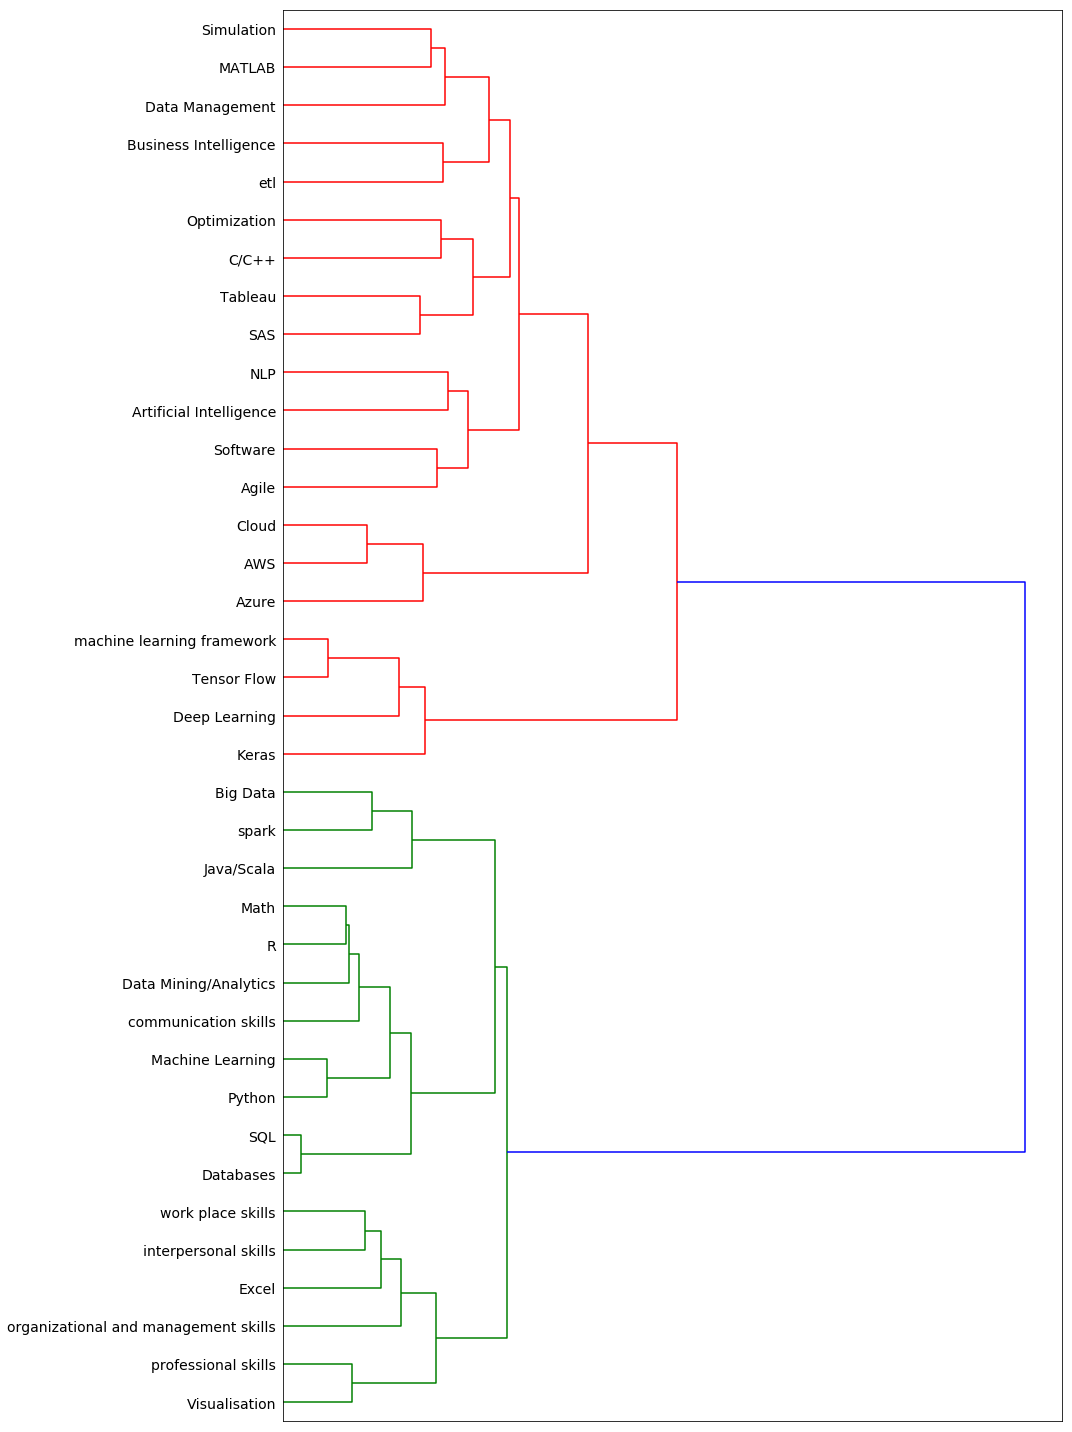

In [27]:
# Applying the defined fucntion to the dataframe and the dictionary 
Hierarchical_clustering(Kaggle_final,skills_keywords_dict,True)

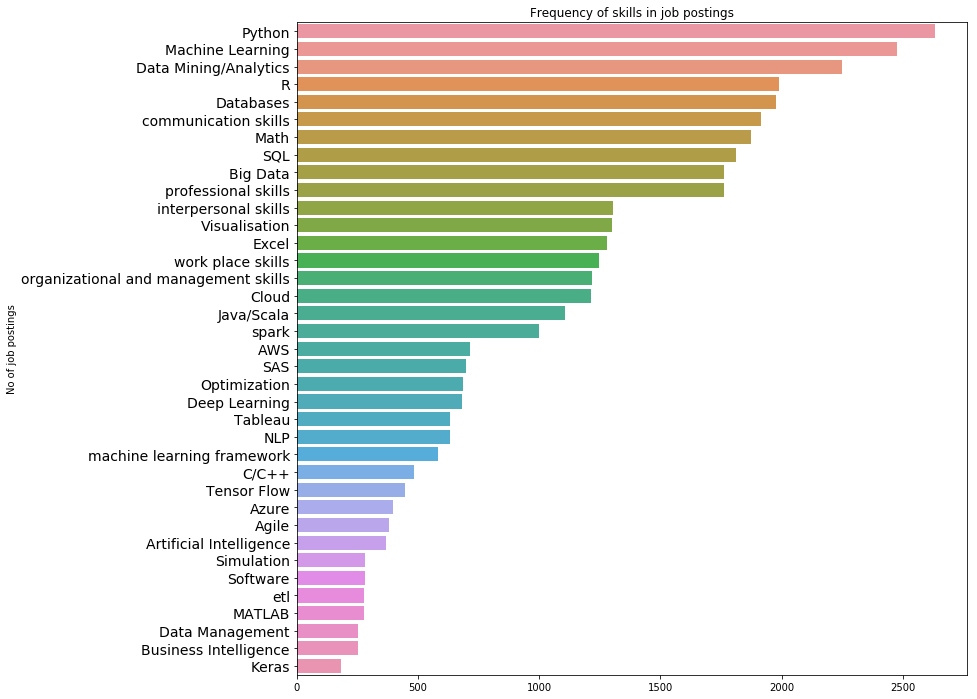

In [28]:
# Plotting the frequency of skills in job postings
plt.figure(figsize=(12,12))
sums_of_skills = Kaggle_final.iloc[:, 1:].sum().sort_values(ascending=False)
sns.barplot(y=sums_of_skills.index, x=sums_of_skills,orient ='h')
# Custoizing the tickmarks on y axis
plt.yticks(fontsize=14)
# Setting the plot y label
plt.ylabel("No of job postings")
# Setting the plot title
plt.title("Frequency of skills in job postings")
# Displaying the plot
plt.show()

As we can interpret from the above shown figure, Python is one of the most important skills that need to have in mind. Contrary to what we had in case of glassdoor job postings, we can see machine learning is a significantly important skill that a data scientist should have. Almost 2500 job postings require this skill as their primary required skill. Similar to glassdoor data frame, data base is another important skill that we are not exposed to in MIE 1624. Hence, it can be useful to give a little bit introduction to databases. In addition, data mining similar to glassdoor case is an important skill that needs to be considered during designing the course. We are now can be sure that SQL need to be implemented in this course in order to increase chance of students to find job opportunities in data science field. Visualization is an important skill that need to be developed in this course. More project and presentations can be used to develop this skill. Cloud programming is another important skill that is neglected in this course, which can be taught as an introduction. Our interpret is that deep learning and optimization can be removed from this course due to two important reasons. First, deep learning method needs a good understanding of machine learning that a student who attend MIE 1624 generally does not have. In addition, from the name of this course we can understand it is an introduction course so we do not go thoroughly in concept of different subjects. In the next step, we will make our dictionary more generalized to see what concepts need to be taught in MIE 1624.

In [29]:
General_dic = {
                           
                            'Programming':[' R ','Python','Java', 'JVM', 'Scala', 'Javascript'],
                            'Databases/SQL': ['SQL', 'databases','NOSQL','Oracle'],
                            'Machine Learning': ['Machine Learning'],
                            'Artificial Intelligence':['artificial intelligence'],
                            'Optimization':['Optimization'],
                            'Simulation':['Simulation'],
                            'Project Management':['Project Management','Team work','Cooperation'],
                            'Data Visualisation': ['Visualisation', 'Visualization','Power Point', 'Tableau'],
                            'Software Development':['Software development','Agile'],
                            
                            'Software Development':['Software development'],
                            'Big Data': ['Big Data', 'Spark', 'kafka', 'Hive', 
                                         'beam', 'Hadoop', 'MapReduce', 'Hbase','MangoDB','Cassandra','Neo4','HDFS',
                                        'Google Cloud Dataproc',
                                        'Google Cloud Dataflow',
                                        'Google Cloud Dataprep',
                                        'AWS Kinesis',
                                        'Google Cloud Pub/Sub',
                                        'AWS Athena',
                                        'AWS Redshift',
                                        'Google BigQuery',
                                        'Teradata',
                                        'Microsoft Analysis Services',
                                        'Oracle Exadata',
                                        'Oracle Warehouse Builder',
                                        'SAP IQ',
                                        'Snowflake',
                                        'Databricks',
                                        'Azure SQL Data Warehouse',
                                        'Azure HDInsight',
                                        'Azure Stream Analytics',
                                        'IBM InfoSphere DataStorage',
                                        'IBM Cloud Analytics Engine',
                                        'IBM Cloud Streaming Analytics',
                                        ],
                            'Data Mining/Analytics': ['Data Mining',  'Data Analytics',],  
                            'Cloud': ['Cloud', 'AWS','EC2', 'GCP', 'Azure ', 'Google Cloud'
                                                        'Amazon Web Services',
                                                        'Microsoft Azure',
                                                        'IBM Cloud',
                                                        'Alibaba Cloud',
                                      
                                                        'Google Compute Engine',
                                                        'AWS Elastic Beanstalk',
                                                        'Google App Engine',
                                                        'Kubernete',
                                                        'Lambda',
                                                        'Google Cloud Functions',
                                                        'AWS Batch',
                                                        'Azure Virtual Machines',
                                                        'Azure Container Service',
                                                        'Azure Functions',
                                                        'Azure Event Grid',
                                                        'Azure Batch',
                                                        'Azure Kubernetes Service',
                                                        'IBM Cloud Virtual Servers',
                                                        'IBM Cloud Container Registry',
                                                        'IBM Cloud Kubernetes Service',
                                                        'IBM Cloud Foundry'
                                                        ],
                            'Deep Learning':['Deep learning', 'Tensor Flow','Caffe','Keras','Microsoft Cognitive Toolkit','IBM Watson','DeepLearning4J'],
                            }

In [30]:
Kaggle_job= skill_count(kaggle,General_dic)

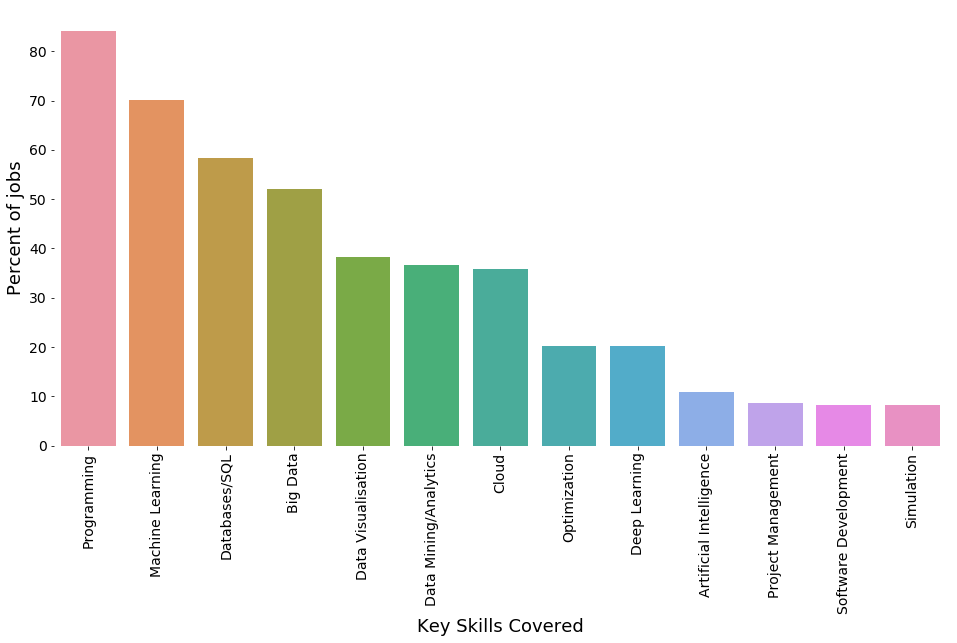

In [31]:
plt.figure(figsize=(16,8))
sums_of_skills = Kaggle_job.iloc[:, 1:].sum().sort_values(ascending=False)/len(Kaggle_job)*100
sns.barplot(x=sums_of_skills.index, y=sums_of_skills,orient ='v')
plt.xticks(fontsize=14,rotation =90)
plt.yticks(fontsize=14)

plt.xlabel("Key Skills Covered", fontsize=18)
plt.ylabel("Percent of jobs", fontsize=18)

# plt.title("Frequency of skills in job postings", fontsize=18, y=0.9,x=0.1)
plt.box(on=None)
plt.show()

Based on the analysis on the kaggle's job posting data frame, Programming is should be included in our course, which is considered. Machine learning algorithm should be taught in the course. However, we suggest to go with the presentations about different ML algorithm and teach only two or three important ones. Database and SQL is not covered in this course, which is in the opposite of our analysis. We need to devote a lecture or two to big data. Data visualization should be implemented in the course project and assignments as we have in case of current curriculum. Data mining is another skill that we are not covering in this course. Nevertheless, giving a introduction to data mining will be useful for students. Cloud computing also is a topic that can be covered in the form of an assignment or small project. Optimization and deep learning can be allocated to other courses that we will discuss in the second part.

In the following part, we want to go a little bit deeper into Kaggle's surveys to finalize our decision about how to structure the course. We are going to start with 2018 data frame. Up until now, we looked into the skills with perspective of job opportunities. Now, we are going to do some analysis to see what is the most important skills considering salary as a target variable.

## Kaggle survey 2018
In the first part of our analysis, we are going to go through kaggle data science survey from 2018. The survey was provided by kaggle website and it has several questions, including multiple-choice questions. As a factor of success, we decided to use annual compensation as our target variable. We are going to drop the samples that do not have yearly compensation. Since we are not able to determine their success. Based on the success we are going to find what skills are required to increase the productivity of students in the University of Toronto. After finishing our analysis, we are going to determine which topics should be covered in the MIE 1624

In [32]:
data = pd.read_csv(r'C:\Users\Mostafa Kouchakzadeh\Desktop\MIE Project\kaggle-survey-2018\multipleChoiceResponses.csv', dtype=str)

# drop rows with NaN target variable
data.dropna(subset=['Q9'],inplace=True)

In [33]:
# remove rows where salary is not disclosed
data = data[data['Q9']!= "I do not wish to disclose my approximate yearly compensation"]
# add index columns
data.loc[1:,'index'] = data[1:].reset_index().index

In order to be consistent with the previous part, we are going to only focus in countries that have similar characteristics. We chose Canada and US.

In [34]:
data=data[data['Q3'].isin(['United States of America','Canada'])]

In [35]:
salary_buckets = {   '0-10,000': '0-10,000',
    '0-20,000': '0-20,000', 
    '20-30,000': '20-30,000',
    '30-40,000': '30-40,000', 
    '40-50,000': '40-50,000', 
    '50-60,000': '50-60,000',
    '60-70,000': '60-70,000',
    '70-80,000': '70-80,000', 
    '80-90,000': '80-90,000', 
    '90-100,000': '90-100,000',
    '100-125,000':'100-125,000',
    '125-150,000':'125-150,000',
    '150-200,000':'150-200,000',
    '200-250,000':'200-250,000',
    '250-300,000':'>250,000',
    '300-400,000':'>250,000',
    '400-500,000':'>250,000',
    '> $500,000':'>250,000'}

In [36]:
#Combining the salary buckets
data.loc[1:,'Q9_buckets'] = data.loc[1:,'Q9'].map(salary_buckets)
data.Q9_buckets.unique()

array(['0-10,000', '125-150,000', '30-40,000', '100-125,000',
       '90-100,000', '80-90,000', nan, '>250,000', '50-60,000',
       '70-80,000', '150-200,000', '60-70,000', '40-50,000', '20-30,000',
       '200-250,000'], dtype=object)

In [37]:
# check the title distributions of respondants in the survey
data['Q6'].value_counts()

Data Scientist             891
Student                    554
Software Engineer          458
Data Analyst               371
Other                      316
Research Scientist         201
Business Analyst           171
Consultant                 155
Manager                    132
Data Engineer              131
Research Assistant         124
Product/Project Manager     80
Chief Officer               69
Statistician                49
Principal Investigator      36
Marketing Analyst           30
Salesperson                 27
DBA/Database Engineer       24
Developer Advocate          13
Data Journalist              2
Name: Q6, dtype: int64

From the list shown above, many jobs are not focused in the concept of our analysis. Jobs such as salesperson. So we are going to only keep job titles that are useful in the field we want determine useful skills.

In [38]:
# Keep remaining positions of interest
data = data.loc[data['Q6'].isin(['Data Scientist','Data Analyst','Business Analyst','Data Engineer','Statistician','DBA/ Database Engineer','Marketing Analyst','Data Journalist','Product/Project Manager','Chief Officer'])]


Text(0.5, 1.0, 'Job title distribution of the data frame')

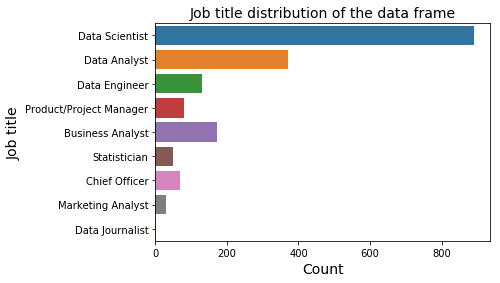

In [39]:
ax=sns.countplot(y='Q6',data = data)
ax.set_ylabel('Job title', fontsize=14)
ax.set_xlabel('Count', fontsize=14)
ax.set_title('Job title distribution of the data frame', fontsize=14)

Most of job postings are related to data science and data analysis fields. 

In [40]:
# Target variable ordering
salary_ordered = ['0-10,000' ,
                    '10-20,000',
                    '20-30,000',
                    '30-40,000',
                    '40-50,000',
                    '50-60,000',
                    '60-70,000',
                    '70-80,000',
                    '80-90,000',
                    '90-100,000',
                    '100-125,000',
                    '125-150,000',
                    '150-200,000',
                    '200-250,000',
                    '>250,000',]
data['Q9_buckets'] = pd.Categorical(data['Q9_buckets'], salary_ordered)

Text(0.5, 1.0, 'Job title distribution of the data frame')

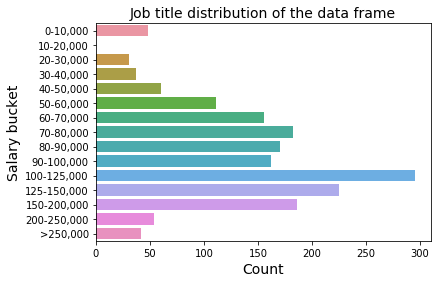

In [41]:
ax=sns.countplot(y='Q9_buckets',data = data)
ax.set_ylabel('Salary bucket', fontsize=14)
ax.set_xlabel('Count', fontsize=14)
ax.set_title('Job title distribution of the data frame', fontsize=14)

The salary's distribution seems to be normal with the highest peak for salary between 125 to 150k per year.

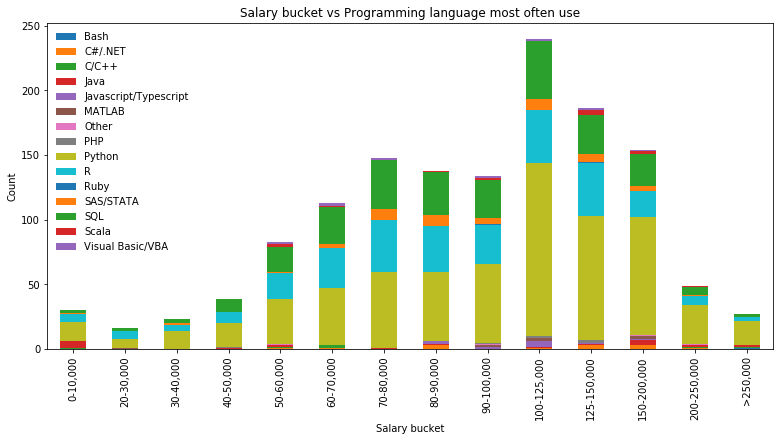

In [42]:
ax = data.groupby(['Q9_buckets','Q17']).size().unstack().plot(kind='bar',stacked=True,figsize=(13, 6))
ax.set_xlabel('Salary bucket')
ax.set_ylabel('Count')
ax.set_title('Salary bucket vs Programming language most often use')
ax.legend(loc='best', frameon=False)

From above shown figure, python has a big contribution in all of the salary buckets. Therefore, Python should be one of the most important reasons that a specific female in Canada or US has a good salary. Also, in a high salaries we see that programing language R can be very useful too. In addition SQL is being used by the respondents who are in the middle salary buckets. Let us take a look at which local hosted development environment is popular in each salary bucket.

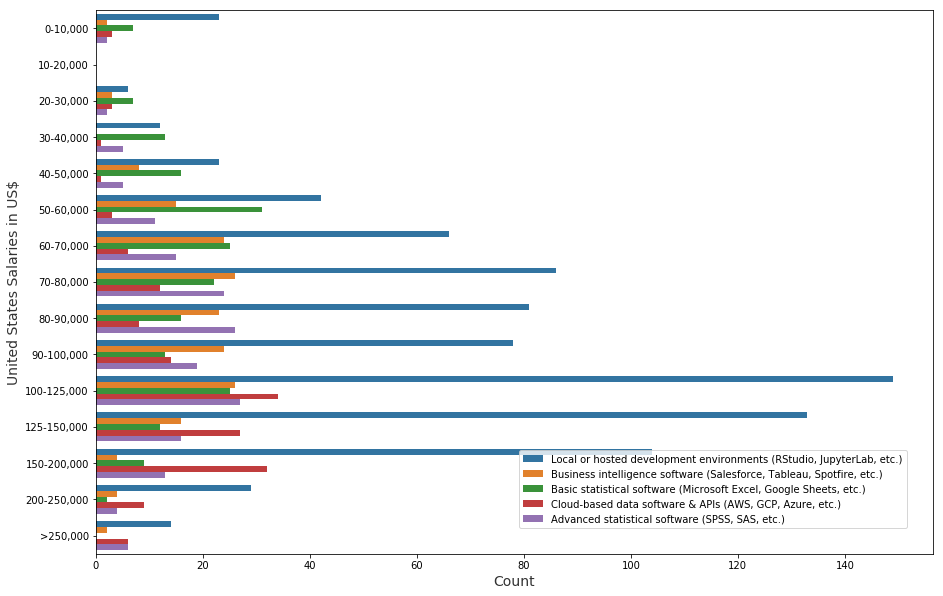

In [43]:
data = data[data['Q12_MULTIPLE_CHOICE']!= "Other"]
j = sns.countplot(y='Q9_buckets',data = data, hue='Q12_MULTIPLE_CHOICE')
j.set_xlabel("Count",size=14,alpha=0.8)
j.set_ylabel("United States Salaries in US$",size=14,alpha=0.8)
j.legend(loc='best', bbox_to_anchor=(.5,.2), ncol=1)
fig = plt.gcf()
fig.set_size_inches( 15, 10)

As we can from the result of the count plot one of the most important primary tools to analyze data is local andd hosted development evironments as we can see they have the highet contribution in all the salary buckets. However, Cloud-based data softwares are more likely to show up in the higher salary buckets than in the lower ones.

We are going to take look into what ML library experienced respondents would use in their work.

In [44]:
data.Q20.value_counts()

Scikit-Learn    612
Caret           100
Keras            97
TensorFlow       87
randomForest     85
Xgboost          84
Spark MLlib      34
H20              20
PyTorch          19
Other            14
Fastai            9
Prophet           8
lightgbm          8
mlr               7
Mxnet             2
catboost          2
CNTK              1
Name: Q20, dtype: int64

In [45]:
data1 = data[data['Q20']!= "Mxnet"]
data1 = data1[data1['Q20']!= "catboost"]
data1 = data1[data1['Q20']!= "CNTK"]
data1 = data1[data1['Q20']!= "mlr"]
data1 = data1[data1['Q20']!= "Prophet"]
data1 = data1[data1['Q20']!= "lightgbm"]
data1 = data1[data1['Q20']!= "Fastai"]
data1 = data1[data1['Q20']!= "Other"]
data1 = data1[data1['Q20']!= "PyTorch"]
data1 = data1[data1['Q20']!= "H20"]

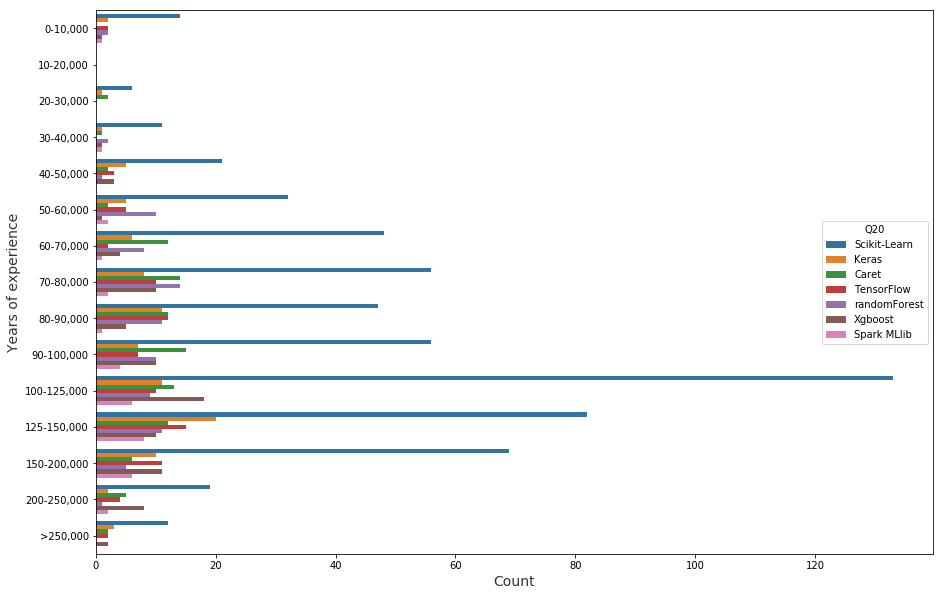

In [46]:
j = sns.countplot(y='Q9_buckets',data = data1, hue='Q20')
j.set_xlabel("Count",size=14,alpha=0.8)
j.set_ylabel("Years of experience",size=14,alpha=0.8)
fig = plt.gcf()
fig.set_size_inches( 15, 10)

We drop the librairies wich has the lowest people using them since they can tell us much about the importance. As we can see from the countplot scikit-learn is the primary library that is being used with all the salary buckets. However, we can see that as the salary buckets increase respondents are usig libraries which are related to specifically more complicated problems such as neural netwrok. In the next part, we need to have the whole data set, so we import it.

In [47]:
df = pd.read_csv(r'C:\Users\Mostafa Kouchakzadeh\Desktop\MIE Project\kaggle-survey-2018\multipleChoiceResponses.csv',index_col=0, skiprows=[1], low_memory=False)

# drop rows with NaN target variable
df.dropna(subset=['salary_int'],inplace=True)

In [48]:
df = df[df['salary_int']!= "I do not wish to disclose my approximate yearly compensation"]
df['salary_int'] = pd.to_numeric(df['salary_int'], downcast='float')

We want to analyze to see that what is the average salary associated with each programming language. 

In [49]:
df1= pd.DataFrame({'Count' : df.groupby('Q17').size(), 'Salary': df.groupby('Q17')['salary_int'].mean()/1000}).reset_index()
df1.sort_values(by=['Salary'], ascending = False)
df1

Q17  Count     Salary
0                    Bash     45  63.333332
1                 C#/.NET    329  52.203648
2                   C/C++    464  41.557114
3                      Go     35  75.071426
4                    Java    623  49.703053
5   Javascript/Typescript    308  45.235390
6                   Julia      7  52.142857
7                  MATLAB    247  39.635628
8                   Other     93  67.500000
9                     PHP    149  35.201344
10                 Python   5866  51.133228
11                      R   1526  59.647774
12                   Ruby     42  65.714287
13              SAS/STATA    179  69.092178
14                    SQL    999  63.838840
15                  Scala     81  78.395065
16       Visual Basic/VBA     95  54.947369

In [50]:
df1.drop(df1[df1.Q17=='C#/.NET'].index, axis=0, inplace=True)
df1.drop(df1[df1.Q17=='Go'].index, axis=0, inplace=True)
df1.drop(df1[df1.Q17=='Julia'].index, axis=0, inplace=True)
df1.drop(df1[df1.Q17=='Visual Basic/VBA'].index, axis=0, inplace=True)
df1.drop(df1[df1.Q17=='PHP'].index, axis=0, inplace=True)
df1.drop(df1[df1.Q17=='Javascript/Typescript'].index, axis=0, inplace=True)
df1.drop(df1[df1.Q17=='Other'].index, axis=0, inplace=True)
df1.reset_index(drop=True, inplace=True)
df1

Q17  Count     Salary
0       Bash     45  63.333332
1      C/C++    464  41.557114
2       Java    623  49.703053
3     MATLAB    247  39.635628
4     Python   5866  51.133228
5          R   1526  59.647774
6       Ruby     42  65.714287
7  SAS/STATA    179  69.092178
8        SQL    999  63.838840
9      Scala     81  78.395065

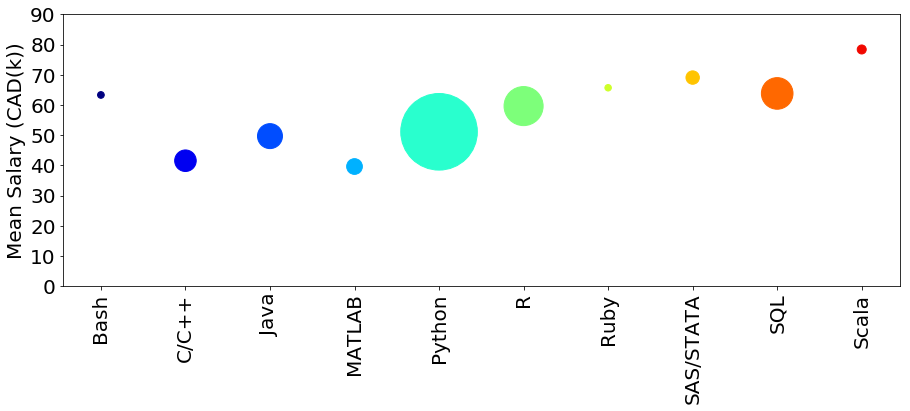

In [51]:
# doubling the area of markers
from matplotlib import cm
f, ax= plt.subplots(figsize=(15,5))
x = df1.Q17
y = df1.Salary
s = df1.Count
plt.scatter(x,y,s=s, color = [cm.jet(1.*e/len(x)) for e in range(len(x))])
plt.xticks(rotation = 90, fontsize= 20)
plt.yticks(fontsize= 20)
plt.ylabel('Mean Salary (CAD(k))', fontsize= 20)
plt.ylim(0, 90)
plt.savefig('Scatter.png', dpi=300, transparent=True , bbox_inches='tight')
#plt.grid(b=None)
#plt.box(on=None)
plt.show()

The size of each circle shows the number of occurace of each specific programming language in the average salary. We can see that again Python, R and SQl are the most important programming languages in the kaggle 2018 survey.

In the next part, we are going to start analyzing Kaggle survey for 2019. 

In [52]:
salaries = pd.read_csv(r"C:\Users\Mostafa Kouchakzadeh\Desktop\MIE Project\Kaggle_Salary (2).csv")
salaries.head()

Time from Start to Finish (seconds)     Q1    Q2  Q2_OTHER_TEXT         Q3  \
0                                  510  22-24  Male             -1     France   
1                                  423  40-44  Male             -1      India   
2                                  391  40-44  Male             -1  Australia   
3                                  392  22-24  Male             -1      India   
4                                  470  50-54  Male             -1     France   

                    Q4                 Q5  Q5_OTHER_TEXT  \
0      Master’s degree  Software Engineer             -1   
1  Professional degree  Software Engineer             -1   
2      Master’s degree              Other              0   
3    Bachelor’s degree              Other              1   
4      Master’s degree     Data Scientist             -1   

                     Q6   Q7      ...       Q34_Part_6  \
0  1000-9,999 employees    0      ...              NaN   
1    > 10,000 employees  20+      ...              NaN   
2    > 10,000 employees  20+      ...              NaN   
3        0-49 employees    0      ...              NaN   
4        0-49 employees  3-4      ...              NaN   

                        Q34_Part_7 Q34_Part_8          Q34_Part_9 Q34_Part_10  \
0                              NaN        NaN                 NaN         NaN   
1                              NaN        NaN                 NaN         NaN   
2                              NaN        NaN  Azure SQL Database         NaN   
3                              NaN        NaN                 NaN         NaN   
4  AWS Relational Database Service        NaN                 NaN         NaN   

  Q34_Part_11 Q34_Part_12 Q34_OTHER_TEXT Q10_Encoded    Q10_buckets  
0         NaN         NaN             -1           3  30,000-39,999  
1         NaN         NaN             -1           0        0-9,999  
2         NaN         NaN             -1          14       >250,000  
3         NaN         NaN             -1           0        0-9,999  
4         NaN         NaN             -1           6  60,000-69,999  

[5 rows x 248 columns]

Text(0.5, 1.0, 'Salary Distribution in U.S.A.')

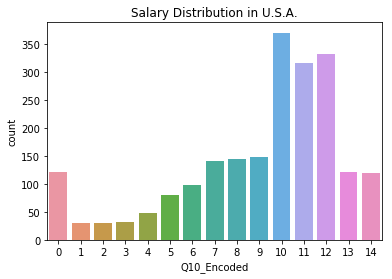

In [53]:
# Salary bucket distribution in the United States
sns.countplot(x = salaries[salaries['Q3'] == 'United States of America'].Q10_Encoded, data = salaries[salaries['Q3'] == 'United States of America']).set_title('Salary Distribution in U.S.A.')

This plot shows that data scientists from America compose a significant portion of the upper salary buckets. We may be able to generalize this and hypothesize that developed nations generally will have high salaries_usa than developing nations. Let's explore the same plot with India as the country.

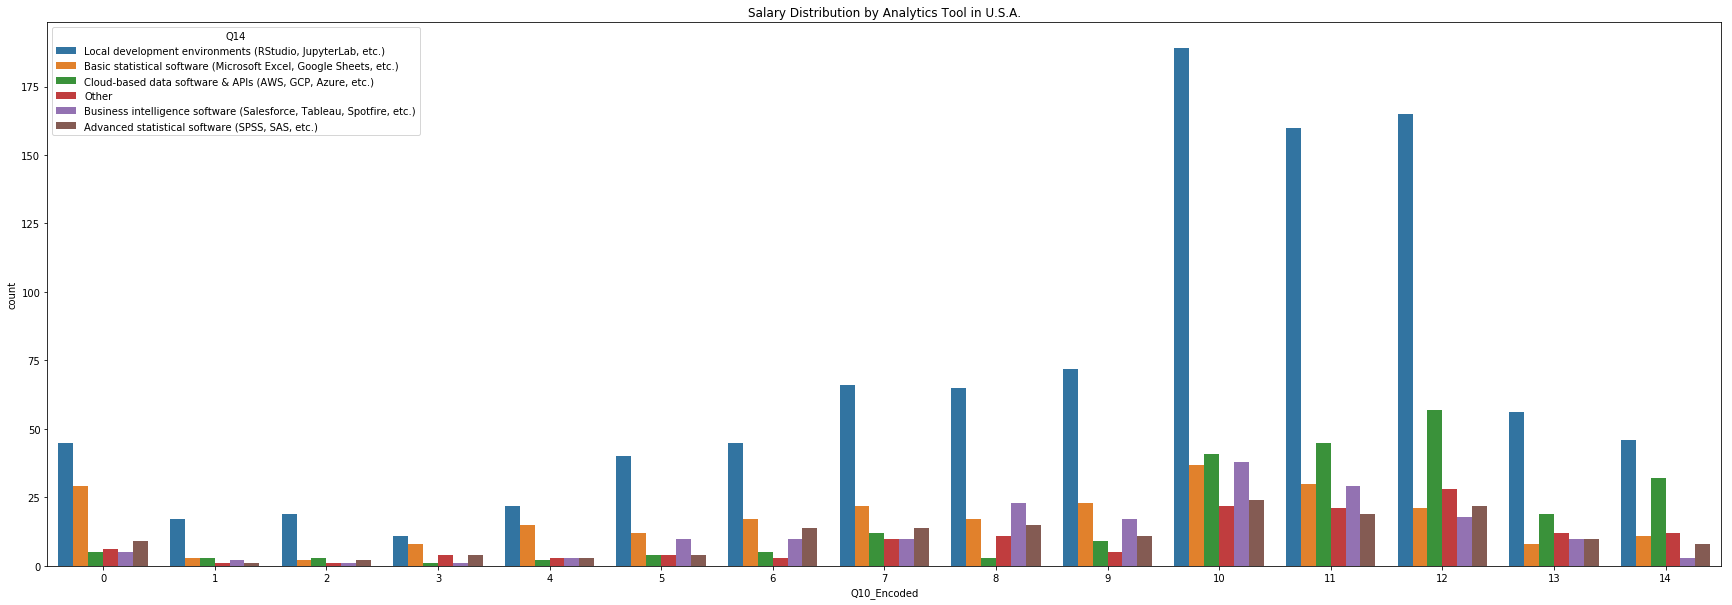

In [54]:
# Q14 Statistics
salaries_usa = salaries[salaries['Q3'] == 'United States of America']
fig = plt.figure(figsize=(30,10))
ax = sns.countplot(x = 'Q10_Encoded', hue = 'Q14', data = salaries_usa).set_title('Salary Distribution by Analytics Tool in U.S.A.')

This plot shows that Local Development Environments such as JupyterLab should remain a core aspect of the course. In addition to this, cloud based software including Azure, AWS, etc. correlate to high salaries and may have a larger influence in the course curriculum. For 2019 surveys, we decided to use LASSO regularization to analyze the importance of features that we have in this survey.

In [55]:
salaries_usa.drop('Q3', inplace = True, axis = 1)

In [56]:
# Q4 we have oredered categorical data
salaries_usa.Q4.unique()
degree_nums = {'No formal education past high school': 0, 
                  'I prefer not to answer': 0, 
                  'Some college/university study without earning a bachelor’s degree': 1,
                  'Bachelor’s degree': 2,
                  'Professional degree': 2,
                  'Master’s degree': 3,
                  'Doctoral degree': 4}
salaries_usa.replace({'Q4': degree_nums}, inplace = True)


In [57]:
# Q5 we use one-hot-encoding.
job_dummies = pd.get_dummies(salaries_usa.Q5, prefix = 'Q5')

salaries_usa = salaries_usa.join(job_dummies)
salaries_usa.drop(['Q5', 'Q5_OTHER_TEXT'], inplace = True, axis = 1)

In [58]:
# Q6 and Q7 we have ordered categorical data (i.e. number of employees, number of in) so we return to using label encoding as follows.
employee_nums = {'0-49 employees': 0, '50-249 employees': 1, '250-999 employees': 2, '1000-9,999 employees': 3, '> 10,000 employees': 4}
Q7_nums = {'0': 0, '1-2': 1, '3-4': 2, '5-9': 3, '10-14': 4, '15-19': 5, '20+': 6}
salaries_usa.replace({'Q6': employee_nums}, inplace = True)
salaries_usa.replace({'Q7': Q7_nums}, inplace = True)

In [59]:
# Q8 is categorical data that doesn't use number range buckets, but I would still consider it ordered data.
# Based off my own interpretation of the available answers, the following label encoding was implemented.
salaries_usa.Q8.unique()
MLmethods_nums = {'No (we do not use ML methods)': 0, 
                  'I do not know': 0, 
                  'We are exploring ML methods (and may one day put a model into production)': 1,
                  'We use ML methods for generating insights (but do not put working models into production)': 2,
                  'We recently started using ML methods (i.e., models in production for less than 2 years)': 3,
                  'We have well established ML methods (i.e., models in production for more than 2 years)': 4}

salaries_usa.replace(MLmethods_nums, inplace = True)

In [60]:
# Q9 has 8 possible selections that are NOT mutually exclusive. The answers are essentially already one-hot-encoded.
# We must replace text values with 1, and nulls with 0 for each part.

Q9part1_nums = {'Analyze and understand data to influence product or business decisions': 1}
Q9part2_nums = {'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data': 1}
Q9part3_nums = {'Build prototypes to explore applying machine learning to new areas': 1}
Q9part4_nums = {'Build and/or run a machine learning service that operationally improves my product or workflows': 1}
Q9part5_nums = {'Experimentation and iteration to improve existing ML models': 1}
Q9part6_nums = {'Do research that advances the state of the art of machine learning': 1}
Q9part7_nums = {'None of these activities are an important part of my role at work': 1}
Q9part8_nums = {'Other': 1}

salaries_usa.replace({'Q9_Part_1': Q9part1_nums, 'Q9_Part_2': Q9part2_nums, 'Q9_Part_3': Q9part3_nums, 'Q9_Part_4': Q9part4_nums,
                 'Q9_Part_5': Q9part5_nums, 'Q9_Part_6': Q9part6_nums, 'Q9_Part_7': Q9part7_nums, 'Q9_Part_8': Q9part8_nums}, 
                 inplace = True)

salaries_usa = salaries_usa.fillna(value = {'Q9_Part_1': 0, 'Q9_Part_2': 0, 'Q9_Part_3': 0, 'Q9_Part_4': 0,
                                    'Q9_Part_5': 0, 'Q9_Part_6': 0, 'Q9_Part_7': 0, 'Q9_Part_8': 0})

salaries_usa.drop('Q9_OTHER_TEXT', inplace = True, axis = 1)



In [61]:
# Q11 we will use label encoding since the data is ordered. We also fill null values with zero since it is the most frequent response.
print('The most frequent response is {}, and its percentage of all the repsonses is {:0.3}%.'.format(salaries_usa.Q11.describe().top, 100*salaries_usa.Q11.describe().freq/salaries_usa.Q11.describe()['count']))
Q11_nums = {'$0 (USD)': 0, '$1-$99': 1, '$100-$999': 2, '$1000-$9,999': 3, '$10,000-$99,999': 4, '> $100,000 ($USD)': 5}
salaries_usa = salaries_usa.fillna(value = {'Q11': 0})
salaries_usa.replace({'Q11': Q11_nums}, inplace = True)

The most frequent response is $0 (USD), and its percentage of all the repsonses is 29.7%.


In [62]:
# Q12 has 12 parts. We will approach it the same as Q9 and fill text responses with 1's and nulls with 0's.
# Observing that several of the upcoming questions follow this format, I iterated through the different question parts
# to create the dictionary. Then we can use the .replace() method with the dictionary.

# This function can be used to one-hot-encode the n part responses in the survey. It creates a dictionary to be used within
# the .replace() method.
#
# Input: Question Number, Number of Responses
# Output: Dictionary

def encode12(q_num, response_num):
    temp = {} # Initiate dictionary
    
    for i in range(1,response_num + 1):
        part_num = str(q_num) + '_Part_' + str(i)
        temp[part_num] = {salaries_usa[part_num][salaries_usa[part_num].notna()].unique()[0]: 1}
        
    return temp
    
Q12_nums = encode12('Q12', 12)
salaries_usa.replace(Q12_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q12_Part_1': 0, 'Q12_Part_2': 0, 'Q12_Part_3': 0, 'Q12_Part_4': 0,
                                    'Q12_Part_5': 0, 'Q12_Part_6': 0, 'Q12_Part_7': 0, 'Q12_Part_8': 0,
                                    'Q12_Part_9': 0, 'Q12_Part_10': 0, 'Q12_Part_11': 0, 'Q12_Part_12': 0})

salaries_usa.drop('Q12_OTHER_TEXT', inplace = True, axis = 1)


In [63]:
# Q13 also has 12 parts with same format, so we will reuse code from Q12.
Q13_nums = encode12('Q13', 12)
salaries_usa.replace(Q13_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q13_Part_1': 0, 'Q13_Part_2': 0, 'Q13_Part_3': 0, 'Q13_Part_4': 0,
                                    'Q13_Part_5': 0, 'Q13_Part_6': 0, 'Q13_Part_7': 0, 'Q13_Part_8': 0,
                                    'Q13_Part_9': 0, 'Q13_Part_10': 0, 'Q13_Part_11': 0, 'Q13_Part_12': 0})

salaries_usa.drop('Q13_OTHER_TEXT', inplace = True, axis = 1)


In [64]:
# Q14 we will use one-hot-encoding on the categorical data since it is unordered. We will drop the additional Q14_Part_x's
# since they correspond to text input that is unavailable to us. To replace NaNs, we have a couple options. One option is
# fill in the most frequent response, which is 'Local Development Environments'. Another option is that since the response
# was left blank, they probably don't use any of the above, in which case we could fill the nulls with 'None'. We will
# choose the second option and add an additional response 'None'. Note: It may have also been safe to assume that the company
# is at least using Excel, etc. if they aren't using Local Development Environments.
salaries_usa = salaries_usa.fillna(value = {'Q14': 'None'})
Q14_dummies = pd.get_dummies(salaries_usa.Q14, prefix = 'Q14')
salaries_usa = salaries_usa.join(Q14_dummies)
salaries_usa.drop(['Q14', 'Q14_Part_1_TEXT', 'Q14_Part_2_TEXT', 'Q14_Part_3_TEXT', 'Q14_Part_4_TEXT', 'Q14_Part_5_TEXT', 'Q14_OTHER_TEXT'], inplace = True, axis = 1)

In [65]:
# Q15 is ordered categorical so we use label-encoding. We will fill nulss with the mode response.
salaries_usa = salaries_usa.fillna(value = {'Q15': salaries_usa.Q15.describe().top})

Q15_nums = {'I have never written code': 0, '< 1 years': 1, '1-2 years': 2, '3-5 years': 5, '5-10 years': 10, '10-20 years': 20, '20+ years': 30}
salaries_usa.replace({'Q15': Q15_nums}, inplace = True)


In [66]:
# Q16 has 12 parts, same format as Q12 so we will reuse the code.
Q16_nums = encode12('Q16', 12)
    
salaries_usa.replace(Q16_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q16_Part_1': 0, 'Q16_Part_2': 0, 'Q16_Part_3': 0, 'Q16_Part_4': 0,
                                    'Q16_Part_5': 0, 'Q16_Part_6': 0, 'Q16_Part_7': 0, 'Q16_Part_8': 0,
                                    'Q16_Part_9': 0, 'Q16_Part_10': 0, 'Q16_Part_11': 0, 'Q16_Part_12': 0})

salaries_usa.drop('Q16_OTHER_TEXT', inplace = True, axis = 1)

In [67]:
# Q17 has 12 parts, same format as Q12 so we will reuse the code.
Q17_nums = encode12('Q17', 12)
    
salaries_usa.replace(Q17_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q17_Part_1': 0, 'Q17_Part_2': 0, 'Q17_Part_3': 0, 'Q17_Part_4': 0,
                                    'Q17_Part_5': 0, 'Q17_Part_6': 0, 'Q17_Part_7': 0, 'Q17_Part_8': 0,
                                    'Q17_Part_9': 0, 'Q17_Part_10': 0, 'Q17_Part_11': 0, 'Q17_Part_12': 0})

salaries_usa.drop('Q17_OTHER_TEXT', inplace = True, axis = 1)

In [68]:
# Q18 has 12 parts, same format as Q12 so we will reuse the code.
Q18_nums = encode12('Q18', 12)
    
salaries_usa.replace(Q18_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q18_Part_1': 0, 'Q18_Part_2': 0, 'Q18_Part_3': 0, 'Q18_Part_4': 0,
                                    'Q18_Part_5': 0, 'Q18_Part_6': 0, 'Q18_Part_7': 0, 'Q18_Part_8': 0,
                                    'Q18_Part_9': 0, 'Q18_Part_10': 0, 'Q18_Part_11': 0, 'Q18_Part_12': 0})

salaries_usa.drop('Q18_OTHER_TEXT', inplace = True, axis = 1)

In [69]:
# Q19 is unordered categorical data. The majority of responses are 'Python', so we will fill null values with that response.
# We will use one-hot-encoding.
salaries_usa = salaries_usa.fillna(value = {'Q19': salaries_usa.Q19.describe().top})
Q19_dummies = pd.get_dummies(salaries_usa.Q19, prefix = 'Q19')
salaries_usa = salaries_usa.join(Q19_dummies)
salaries_usa.drop(['Q19', 'Q19_OTHER_TEXT'], inplace = True, axis = 1)


In [70]:
# Q20 has 12 parts, same format as Q12 so we will reuse the code.
Q20_nums = encode12('Q20', 12)
    
salaries_usa.replace(Q20_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q20_Part_1': 0, 'Q20_Part_2': 0, 'Q20_Part_3': 0, 'Q20_Part_4': 0,
                                    'Q20_Part_5': 0, 'Q20_Part_6': 0, 'Q20_Part_7': 0, 'Q20_Part_8': 0,
                                    'Q20_Part_9': 0, 'Q20_Part_10': 0, 'Q20_Part_11': 0, 'Q20_Part_12': 0})

salaries_usa.drop('Q20_OTHER_TEXT', inplace = True, axis = 1)

In [71]:
# Q21 has 5 parts, same format as Q12 so we will reuse code.
Q21_nums = encode12('Q21', 5)
salaries_usa.replace(Q21_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q21_Part_1': 0, 'Q21_Part_2': 0, 'Q21_Part_3': 0, 'Q21_Part_4': 0, 'Q21_Part_5': 0})

salaries_usa.drop('Q21_OTHER_TEXT', inplace = True, axis = 1)

In [72]:
# Q22 is ordered so we can use label encoding. Approximately 80% of the responses are 'never', so we can fill nulls with this.
salaries_usa = salaries_usa.fillna(value = {'Q22': salaries_usa.Q22.describe().top})

Q22_nums = {'Never': 0, 'Once': 1, '2-5 times': 2, '6-24 times': 3, '> 25 times': 4}
salaries_usa.replace({'Q22': Q22_nums}, inplace = True)

In [73]:
# Q23 is also ordered categorical data, so we can use label encoding. Although the mode only accounts for 30%
# of the total responses, we may infer that if someone didn't select an answer for this question, it is likely
# because they haven't been using machine learning methods at all. Therefore, we can sefely fill the nulls with
# the mode (i.e. '< 1 years').
salaries_usa = salaries_usa.fillna(value = {'Q23': salaries_usa.Q23.describe().top})

Q23_nums = {'< 1 years': 0, '1-2 years': 1, '2-3 years': 3, '3-4 years': 4, '4-5 years': 5, '5-10 years': 10,
            '10-15 years': 15, '15-20 years': 20, '20+ years': 30}
salaries_usa.replace({'Q23': Q23_nums}, inplace = True)


In [74]:
# Q24 has 12 parts, same format as Q12 so we can reuse code.
Q24_nums = encode12('Q24', 12)
    
salaries_usa.replace(Q24_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q24_Part_1': 0, 'Q24_Part_2': 0, 'Q24_Part_3': 0, 'Q24_Part_4': 0,
                                    'Q24_Part_5': 0, 'Q24_Part_6': 0, 'Q24_Part_7': 0, 'Q24_Part_8': 0,
                                    'Q24_Part_9': 0, 'Q24_Part_10': 0, 'Q24_Part_11': 0, 'Q24_Part_12': 0})

salaries_usa.drop('Q24_OTHER_TEXT', inplace = True, axis = 1)

In [75]:
# Q25 has 8 parts, same format as Q12 so we can reuse code.
Q25_nums = encode12('Q25', 8)
    
salaries_usa.replace(Q25_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q25_Part_1': 0, 'Q25_Part_2': 0, 'Q25_Part_3': 0, 'Q25_Part_4': 0,
                                    'Q25_Part_5': 0, 'Q25_Part_6': 0, 'Q25_Part_7': 0, 'Q25_Part_8': 0,})

salaries_usa.drop('Q25_OTHER_TEXT', inplace = True, axis = 1)

# Q26 has 7 parts, same format as Q12 so we can reuse code.
Q26_nums = encode12('Q26', 7)
    
salaries_usa.replace(Q26_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q26_Part_1': 0, 'Q26_Part_2': 0, 'Q26_Part_3': 0, 'Q26_Part_4': 0,
                                    'Q26_Part_5': 0, 'Q26_Part_6': 0, 'Q26_Part_7': 0})

salaries_usa.drop('Q26_OTHER_TEXT', inplace = True, axis = 1)

# Q27 has 6 parts, same format as Q12 so we can reuse code.
Q27_nums = encode12('Q27', 6)
    
salaries_usa.replace(Q27_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q27_Part_1': 0, 'Q27_Part_2': 0, 'Q27_Part_3': 0,
                                    'Q27_Part_4': 0, 'Q27_Part_5': 0, 'Q27_Part_6': 0})

salaries_usa.drop('Q27_OTHER_TEXT', inplace = True, axis = 1)

# Q28 has 12 parts, same format as Q12 so we can reuse code.
Q28_nums = encode12('Q28', 12)
    
salaries_usa.replace(Q28_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q28_Part_1': 0, 'Q28_Part_2': 0, 'Q28_Part_3': 0, 'Q28_Part_4': 0,
                                    'Q28_Part_5': 0, 'Q28_Part_6': 0, 'Q28_Part_7': 0, 'Q28_Part_8': 0,
                                    'Q28_Part_9': 0, 'Q28_Part_10': 0, 'Q28_Part_11': 0, 'Q28_Part_12': 0})

salaries_usa.drop('Q28_OTHER_TEXT', inplace = True, axis = 1)

# Q29 has 12 parts, same format as Q12 so we can reuse code.
Q29_nums = encode12('Q29', 12)
    
salaries_usa.replace(Q29_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q29_Part_1': 0, 'Q29_Part_2': 0, 'Q29_Part_3': 0, 'Q29_Part_4': 0,
                                    'Q29_Part_5': 0, 'Q29_Part_6': 0, 'Q29_Part_7': 0, 'Q29_Part_8': 0,
                                    'Q29_Part_9': 0, 'Q29_Part_10': 0, 'Q29_Part_11': 0, 'Q29_Part_12': 0})

salaries_usa.drop('Q29_OTHER_TEXT', inplace = True, axis = 1)

# Q30 has 12 parts, same format as Q12 so we can reuse code.
Q30_nums = encode12('Q30', 12)
    
salaries_usa.replace(Q30_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q30_Part_1': 0, 'Q30_Part_2': 0, 'Q30_Part_3': 0, 'Q30_Part_4': 0,
                                    'Q30_Part_5': 0, 'Q30_Part_6': 0, 'Q30_Part_7': 0, 'Q30_Part_8': 0,
                                    'Q30_Part_9': 0, 'Q30_Part_10': 0, 'Q30_Part_11': 0, 'Q30_Part_12': 0})

salaries_usa.drop('Q30_OTHER_TEXT', inplace = True, axis = 1)

# Q31 has 12 parts, same format as Q12 so we can reuse code.
Q31_nums = encode12('Q31', 12)
    
salaries_usa.replace(Q31_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q31_Part_1': 0, 'Q31_Part_2': 0, 'Q31_Part_3': 0, 'Q31_Part_4': 0,
                                    'Q31_Part_5': 0, 'Q31_Part_6': 0, 'Q31_Part_7': 0, 'Q31_Part_8': 0,
                                    'Q31_Part_9': 0, 'Q31_Part_10': 0, 'Q31_Part_11': 0, 'Q31_Part_12': 0})

salaries_usa.drop('Q31_OTHER_TEXT', inplace = True, axis = 1)

# Q32 has 12 parts, same format as Q12 so we can reuse code.
Q32_nums = encode12('Q32', 12)
    
salaries_usa.replace(Q32_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q32_Part_1': 0, 'Q32_Part_2': 0, 'Q32_Part_3': 0, 'Q32_Part_4': 0,
                                    'Q32_Part_5': 0, 'Q32_Part_6': 0, 'Q32_Part_7': 0, 'Q32_Part_8': 0,
                                    'Q32_Part_9': 0, 'Q32_Part_10': 0, 'Q32_Part_11': 0, 'Q32_Part_12': 0})

salaries_usa.drop('Q32_OTHER_TEXT', inplace = True, axis = 1)

# Q33 has 12 parts, same format as Q12 so we can reuse code.
Q33_nums = encode12('Q33', 12)
    
salaries_usa.replace(Q33_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q33_Part_1': 0, 'Q33_Part_2': 0, 'Q33_Part_3': 0, 'Q33_Part_4': 0,
                                    'Q33_Part_5': 0, 'Q33_Part_6': 0, 'Q33_Part_7': 0, 'Q33_Part_8': 0,
                                    'Q33_Part_9': 0, 'Q33_Part_10': 0, 'Q33_Part_11': 0, 'Q33_Part_12': 0})

salaries_usa.drop('Q33_OTHER_TEXT', inplace = True, axis = 1)

# Q34 has 12 parts, same format as Q12 so we can reuse code.
Q34_nums = encode12('Q34', 12)
    
salaries_usa.replace(Q34_nums, inplace = True)
salaries_usa = salaries_usa.fillna(value = {'Q34_Part_1': 0, 'Q34_Part_2': 0, 'Q34_Part_3': 0, 'Q34_Part_4': 0,
                                    'Q34_Part_5': 0, 'Q34_Part_6': 0, 'Q34_Part_7': 0, 'Q34_Part_8': 0,
                                    'Q34_Part_9': 0, 'Q34_Part_10': 0, 'Q34_Part_11': 0, 'Q34_Part_12': 0})

salaries_usa.drop('Q34_OTHER_TEXT', inplace = True, axis = 1)

In [76]:
salaries_usa.drop('Q2_OTHER_TEXT', axis=1, inplace=True)

In [77]:
# Q1: We will encode the different age ranges. Since thiese categories are ordered, we will use label-encoding.
age_nums = {'18-21': 21, '22-24': 22, '25-29': 25, '30-34': 30, '35-39': 35, '40-44': 40, '45-49': 45, '50-54': 50, '55-59': 55, '60-69': 60, '70+': 70}
salaries_usa.replace({'Q1': age_nums}, inplace = True)

In [78]:
gender_dummies = pd.get_dummies(salaries_usa.Q2, prefix = 'Q2')
salaries_usa = salaries_usa.join(gender_dummies)
salaries_usa.drop(['Q2'], inplace = True, axis = 1)

In [79]:
salaries_usa.head()

Time from Start to Finish (seconds)  Q1  Q4  Q6  Q7  Q8  Q9_Part_1  \
6                                   624  22   2   4   6   3        1.0   
10                                  372  30   3   4   6   0        0.0   
11                                  485  50   3   1   1   2        1.0   
16                                  979  35   2   2   4   4        1.0   
27                                  402  30   3   4   6   3        1.0   

    Q9_Part_2  Q9_Part_3  Q9_Part_4             ...              Q19_MATLAB  \
6         0.0        1.0        1.0             ...                       0   
10        0.0        0.0        0.0             ...                       0   
11        1.0        0.0        0.0             ...                       0   
16        0.0        0.0        0.0             ...                       0   
27        1.0        1.0        1.0             ...                       0   

    Q19_None  Q19_Other  Q19_Python Q19_R  Q19_SQL  Q2_Female  Q2_Male  \
6          0          0           1     0        0          1        0   
10         0          0           1     0        0          0        1   
11         0          0           0     0        1          1        0   
16         0          0           1     0        0          0        1   
27         0          0           1     0        0          1        0   

    Q2_Prefer not to say  Q2_Prefer to self-describe  
6                      0                           0  
10                     0                           0  
11                     0                           0  
16                     0                           0  
27                     0                           0  

[5 rows x 247 columns]

We see that we now have over 300 features, though many of these are due to one-hot-encoding. To visualize which are most important, we create a feature correlatin matrix of the top 20 features correlation with salary bucket.

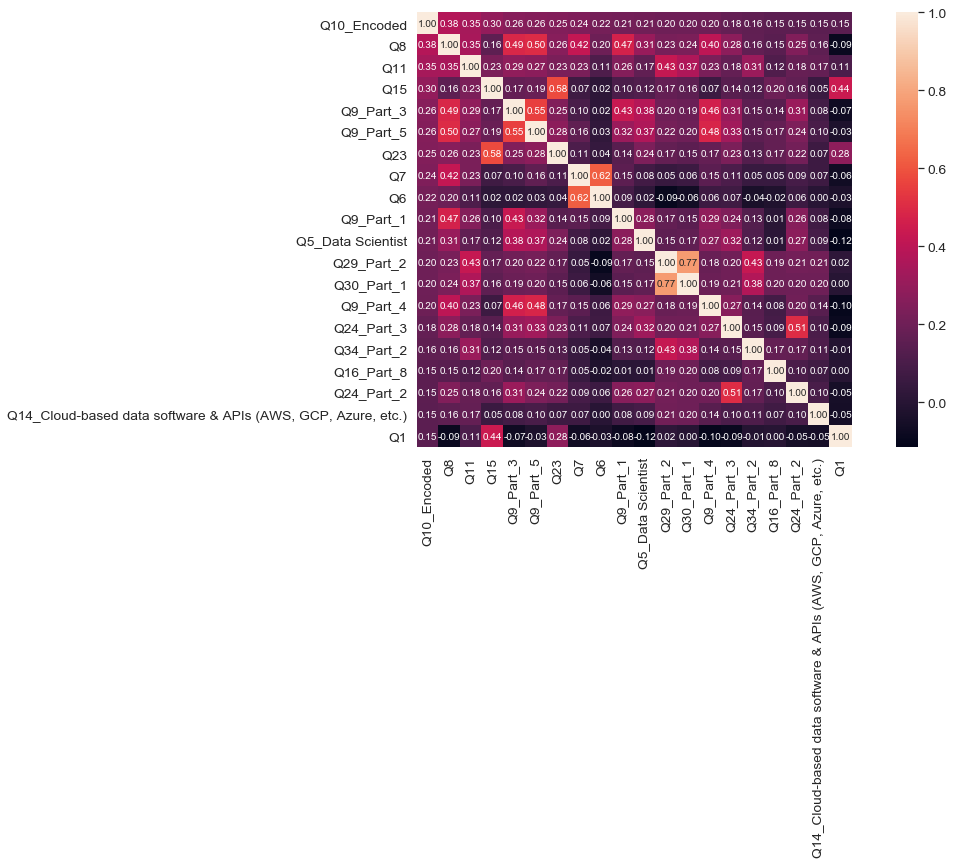

In [80]:
# Feature correlation matrix
k = 20 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = salaries_usa.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'Q10_Encoded')['Q10_Encoded'].index
cm = np.corrcoef(salaries_usa[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We will use the correlation plot in conjuction with the lasso-regularization weights to select skills for the course curriculum.

Feature engineering is a very important component of the machine learning pipeline. Feature engineering is the process of transforming the feature space of a model to improve accuracy. This includes some steps that have already been completed in this assignment, such as label-encoding categorical data, which is essential since machine learning models can't interpret non-numerical data. Another important part of feature engineering is feature scaling. This ensures that features of similar magnitude, so that the model weights (feature importance) aren't determined by arbitrary units or scaling factors. Additionally, feature engineering includes feature selection. This referes to both engineering new features, and dropping irrelevant ones. This reduces the model complexity which can lead to better generalization and faster computation times. 

Since our feature dimensions are quite high (~300), we would like to drop some useless features. We already saw through the correlation matrix some of the features that are indicative of salary. We will now take a more formal approach to feature selection by utilising Lasso-Regularization. We perform regularized regression and view the feature coefficients as a proxy for importance. We then drop the features whose weights have been set to zero.


In [81]:
from sklearn.model_selection import learning_curve, GridSearchCV
# Using Lasso-Regularization for feature selection
salaries_usa.drop(['Q10_buckets'],axis=1)
salaries_usa.drop(['Q10'],axis=1)
from sklearn.metrics import make_scorer, r2_score, confusion_matrix
from sklearn import linear_model

y = salaries_usa.Q10_Encoded
X = salaries_usa.drop(['Q10_Encoded', 'Q10', 'Q10_buckets'], axis = 1)


lasso_reg = linear_model.Lasso(random_state=50)

# Set up parameter grid
param = {'alpha':[0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5], # Constant that multiplies the L1 term. Defaults to 1.0.
             'normalize':[True,False]} #

acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
gcv1 = GridSearchCV(lasso_reg, param, cv=10)
gcv1.fit(X, y)

lasso_reg_best = gcv1.best_estimator_  #Select best parameter combination

print('alpha (Constant that multiplies the L1 term):',gcv1.best_estimator_.alpha) 
print('normalize:',gcv1.best_estimator_.normalize)
lasso_reg_best.fit(X, y)
lasso_reg_best.score(X, y)
feature_coefs = sorted(list(zip(lasso_reg_best.coef_, X)),reverse=True)

# View feature coefficients
feature_coefs


alpha (Constant that multiplies the L1 term): 0.02
normalize: False


[(0.6482541512082055, 'Q2_Male'),
 (0.49022020489206114, 'Q5_Product/Project Manager'),
 (0.45098644193134235, 'Q8'),
 (0.4382369640268011, 'Q5_Software Engineer'),
 (0.4358992327664798, 'Q12_Part_8'),
 (0.4326432830190748, 'Q13_Part_7'),
 (0.40761896398716, 'Q5_Data Scientist'),
 (0.3882136650789877, 'Q11'),
 (0.3818084792315155, 'Q6'),
 (0.3770417474662304, 'Q18_Part_3'),
 (0.3396394760558674, 'Q12_Part_2'),
 (0.3281619478862223,
  'Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)'),
 (0.3235702587925171, 'Q16_Part_8'),
 (0.21534097963197826, 'Q17_Part_11'),
 (0.20791597953914165,
  'Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)'),
 (0.20771123452604623, 'Q9_Part_3'),
 (0.20253399477131928, 'Q18_Part_1'),
 (0.1881855313804979, 'Q31_Part_2'),
 (0.18403612274720552, 'Q19_SQL'),
 (0.13147839227122554, 'Q4'),
 (0.11253150676713186, 'Q34_Part_2'),
 (0.09622778571643488, 'Q16_Part_4'),
 (0.0960204495608149, 'Q30_Part_1'),
 (0.0955320658763837, 'Q19_R'

The results above indicate the features that are correlated with salary. We will use this to make a list of skills (programming languages, cloud services, etc.) that should be incorperated into the Introduction to Data Science course. These include:

- SQL (Q18 Part 3)
- Cloud Based Software & APIs (Q14)
- Business Intelligence Software (Q14)
- Python (Q18 Part 1)
- SQL (Q19)
- PostgresSQL (Q34 Part 2)
- R (Q19)